## Credit Card Fraud Detection

In [ ]:
try:
  from google.colab import drive
  drive.mount('/content/drive',force_remount=True)
  COLAB = True
  print("Mounted from Colab")
  %tensorflow_version 2.x
except:
  print("Unable to mount from Colab")
  COLAB = FALSE

Mounted at /content/drive
Mounted from Colab


In [ ]:
!ls /content/drive/MyDrive/UpGradAssignment/CapstoneCCFraudDetectionProb/

CC_FraudDetection_Argha.ipynb  Credit_card_fraud_detection_Starter_code+.ipynb
creditcard.csv


In [ ]:
import os 
folder = os.path.join('/content/drive/My Drive/UpGradAssignment/CapstoneCCFraudDetectionProb/')

In [ ]:
# importing the required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
import six
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from sklearn import metrics
import math
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 140)


## EDA for the given dataset


In [ ]:
df = pd.read_csv(folder+'creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print('Rows    : {0} \nColumns : {1}'.format(df.shape[0], df.shape[1]))

Rows    : 284807 
Columns : 31


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### Separating numeric features

In [ ]:
# Detecting missing values
df[df.isnull().any(axis=1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### No Missing value noted in the dataset

In [ ]:

dup_df = df[df.duplicated(keep='first')]
print('Dupilcated rows:', dup_df.shape[0])
print('Percentage of dupilcated data: {0} %'.format(round(100*(dup_df.shape[0]/df.shape[0]),2)))

Dupilcated rows: 1081
Percentage of dupilcated data: 0.38 %


In [ ]:

dup_df['Class'].value_counts()

0    1062
1      19
Name: Class, dtype: int64

In [ ]:

actual_rows = df.shape[0]

# dropping the similar rows with dublicates
df.drop_duplicates(keep='first', inplace=True)
print('Rows    : {0} \nColumns : {1}'.format(df.shape[0], df.shape[1]))
print('Percentage of data left: {0} %'.format(round(100*(df.shape[0]/actual_rows),2)))

Rows    : 283726 
Columns : 31
Percentage of data left: 99.62 %


### DistributingClasses

In [ ]:
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100, 2)
fraud_share=round(classes[1]/df['Class'].count()*100, 2)

print('Fradulent transactions (Label 1)     : {0} % ({1})'.format(fraud_share, classes[1]))
print('Non-Fradulent transactions (Label 0) : {0} % ({1})'.format(normal_share, classes[0]))

Fradulent transactions (Label 1)     : 0.17 % (473)
Non-Fradulent transactions (Label 0) : 99.83 % (283253)


#### Data present has imbalance with positive class (frauds) of 0.17 %

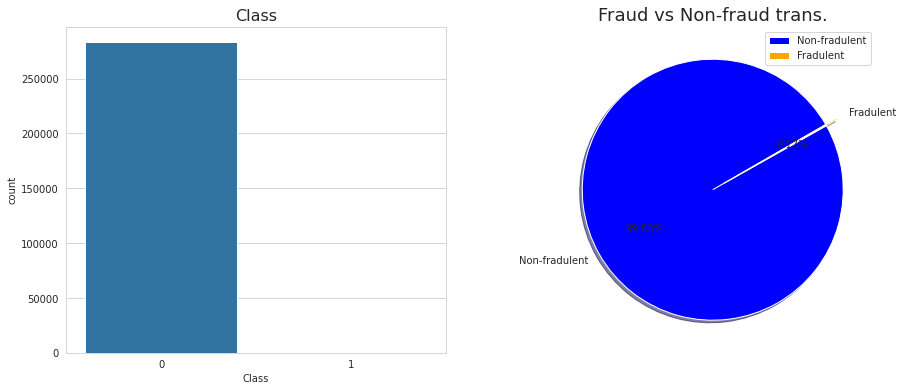

In [ ]:


plt.figure(figsize=(15,6))
plt.subplot(121)
sns.countplot(df['Class'])
plt.title('Class', fontsize=16)

plt.subplot(122)
plt.title('Fraud vs Non-fraud trans.', fontsize=18)
plt.pie(x=[normal_share,fraud_share], explode=[0,0.1],labels=['Non-fradulent','Fradulent'],
        autopct='%1.2f%%', colors=['blue', 'orange'], startangle=30, shadow=True)
plt.legend(loc='best')

plt.show()

In [ ]:
#Stats
df[['Time', 'Amount']].describe()

,Time,Amount
count,283726.000000,283726.000000
mean,94811.077600,88.472687
std,47481.047891,250.399437
min,0.000000,0.000000
25%,54204.750000,5.600000
50%,84692.500000,22.000000
75%,139298.000000,77.510000
max,172792.000000,25691.160000


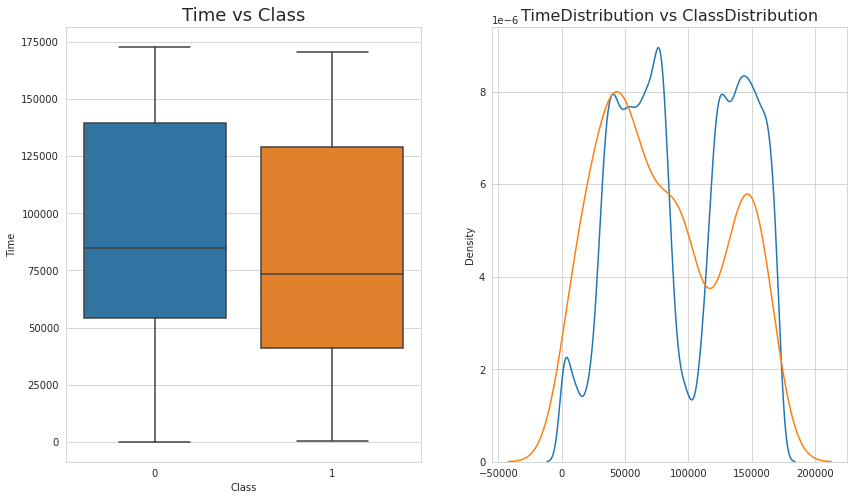

In [ ]:
# Plotting the observations

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.title('Time vs Class', fontsize=18)
sns.boxplot(x='Class', y='Time', data=df)

plt.subplot(122)
plt.title('TimeDistribution vs ClassDistribution', fontsize=16)
sns.distplot(df.loc[df['Class']==0][['Time']],hist=False,label='0')
sns.distplot(df.loc[df['Class']==1][['Time']], hist=False, label='1')

plt.show()

The distribution of the fraudulent transactions indicate that they kept increasing till the 13th hour of the first day and then slowed down for the next 14 hours and then increased again for the next 7 hours and spiked down again.

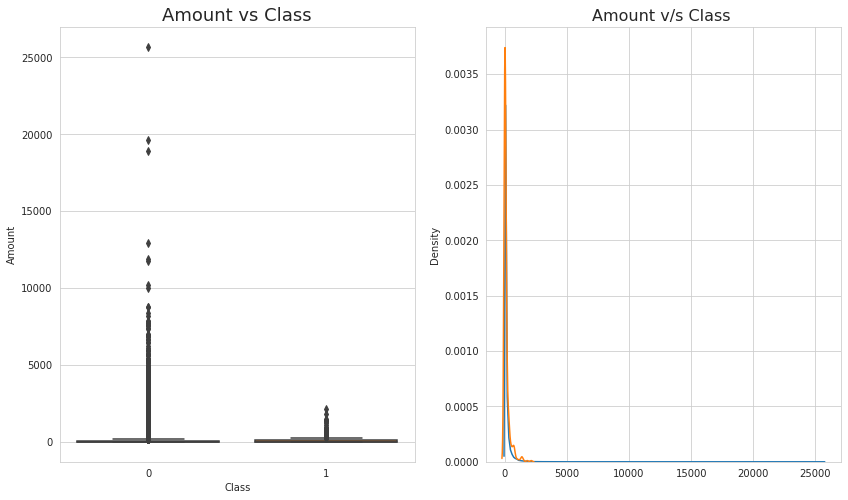

In [ ]:
# Plotting with reference to Amount

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.title('Amount vs Class', fontsize=18)
sns.boxplot(x='Class', y='Amount', data=df)

plt.subplot(122)
plt.title('Amount v/s Class ', fontsize=16)
sns.distplot(df.loc[df['Class']==0][['Amount']],hist=False,label='0')
sns.distplot(df.loc[df['Class']==1][['Amount']], hist=False, label='1')

plt.show()

Fraud occurance < 5000Euros with skewness in the data

### Time v/s Amount dist.

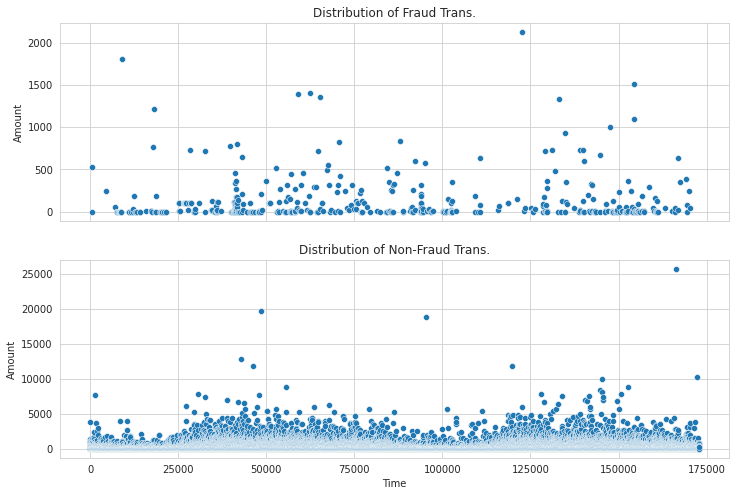

In [ ]:
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(12,8))

sns.scatterplot(x='Time', y='Amount', data=df[df['Class']==1], ax=axs[0])
axs[0].set_title('Distribution of Fraud Trans.')
sns.scatterplot(x='Time', y='Amount', data=df[df['Class']==0], ax=axs[1])
axs[1].set_title('Distribution of Non-Fraud Trans.')

plt.show()

### CorrelationMatrix

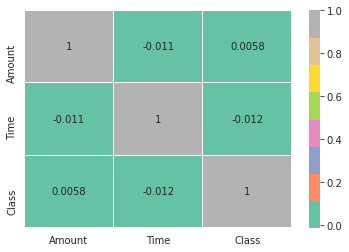

In [ ]:
cor = df[['Amount', 'Time', 'Class']].corr()
sns.heatmap(cor, annot=True, cmap='Set2', linecolor='w', linewidths=0.3)
plt.show()



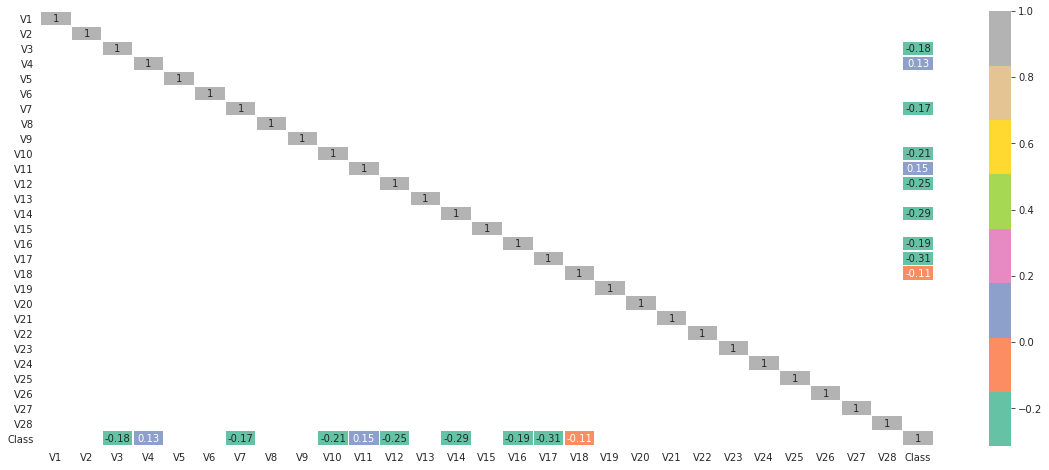

In [ ]:
pca_features = [fig for fig in df.columns if fig.startswith('V')]
cor = df[pca_features + ['Class']].corr()

cor_new = cor[(cor > 0.10) | (cor < -0.10)]

plt.figure(figsize=(20,8))

sns.heatmap(cor_new, annot=True, cmap='Set2', linecolor='w', linewidths=0.3)
plt.show()


### Feature engg.(Time dependent)

In [ ]:
df['Time'] = df['Time']/3600
df['Hour'] = df['Time']%24
df['Hour'] = df['Hour'].apply(lambda x: math.floor(x))
df['Day'] = df['Time']/24
df['Day'] = df['Day'].apply(lambda x: 1 if x==0 else math.ceil(x))

In [ ]:
df[['Time', 'Day', 'Hour']].head()
df[['Time', 'Day', 'Hour']].tail()

,Time,Day,Hour
284802,47.996111,2,23
284803,47.996389,2,23
284804,47.996667,2,23
284805,47.996667,2,23
284806,47.997778,2,23


In [ ]:
day_total = df.groupby('Day')['Class'].count().reset_index(name='Total')
day_total

,Day,Total
0,1,144237
1,2,139489


In [ ]:
day_fraud = df.groupby('Day')['Class'].sum().reset_index(name='Fraud')
day_fraud

,Day,Fraud
0,1,272
1,2,201


In [ ]:
# collaborating day-wise calculation for fraud and non-fraud trans.
day_df = day_total.merge(day_fraud, on='Day')
day_df['Non-Fraud'] = day_df['Total'] - day_df['Fraud']
day_df['Fraud_per'] = round(100*(day_df['Fraud'] / day_df['Total']),2)
day_df

,Day,Total,Fraud,Non-Fraud,Fraud_per
0,1,144237,272,143965,0.19
1,2,139489,201,139288,0.14


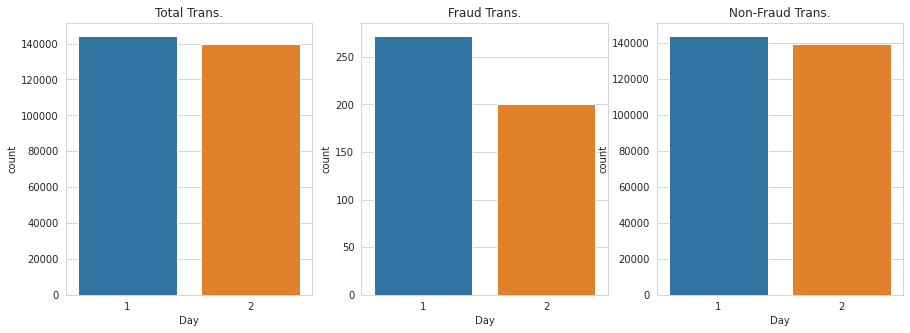

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5))
sns.countplot(df['Day'], ax=axs[0])
axs[0].set_title("Total Trans.")
sns.countplot(df[(df['Class'] == 1)]['Day'], ax=axs[1])
axs[1].set_title("Fraud Trans.")
sns.countplot(df[(df['Class'] == 0)]['Day'], ax=axs[2])
axs[2].set_title("Non-Fraud Trans.")
plt.show()




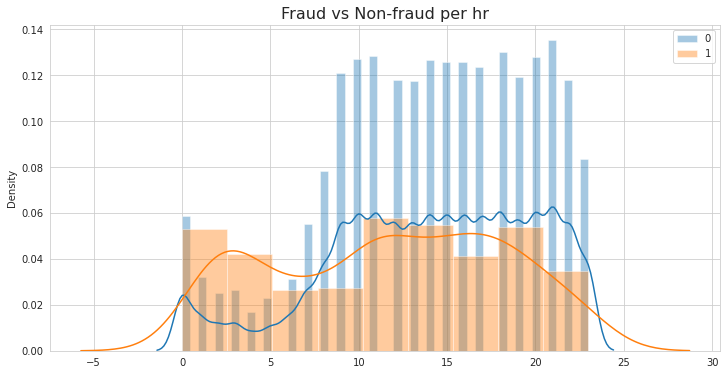

In [ ]:
# checking fraud patterns for the hourly analysis...

plt.figure(figsize=(12,6))

plt.title('Fraud vs Non-fraud per hr', fontsize=16)
sns.distplot(df.loc[df['Class']==0][['Hour']],label='0')
sns.distplot(df.loc[df['Class']==1][['Hour']], label='1')
plt.legend(loc='best')
plt.show()

- #### Frequent Frauds occured between 12am to 5am
- #### Genuine Trans. between 7am to 11pm

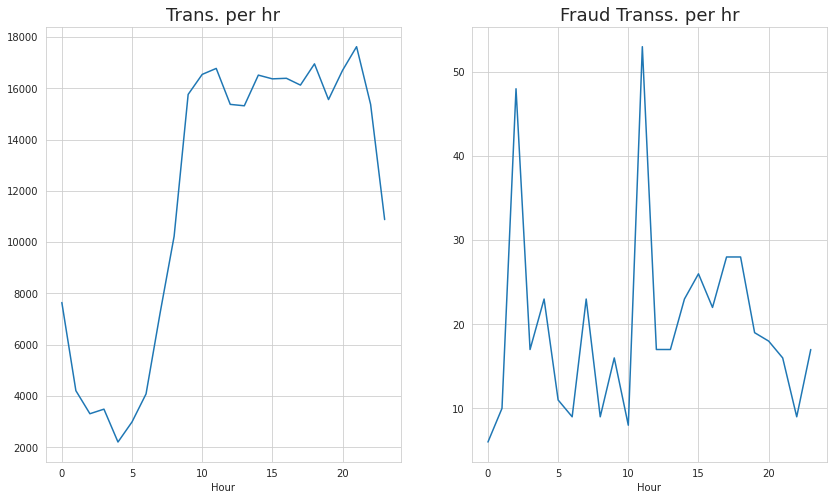

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.title('Trans. per hr', fontsize=18)
df.groupby('Hour').count()['Class'].plot()
plt.subplot(122)
plt.title('Fraud Transs. per hr', fontsize=18)
df.groupby('Hour').sum()['Class'].plot()
plt.show()

In [ ]:
df.drop(['Time', 'Day'], axis=1, inplace=True)

## Preparing the data for further analysis

In [ ]:
y= df['Class'] 
X = df.drop('Class', axis=1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100, stratify = y)
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (198608, 30)
X_test: (85118, 30)
y_train: (198608,)
y_test: (85118,)


In [ ]:
# % for both fraud and non-fraud trans.
print('Fraud trans. (Total):', np.sum(y))
print('Fraud trans. (Train):', np.sum(y_train))
print('Fraud trans. (Test) : ', np.sum(y_test))
print('Percentage distribution of fraud trans. (Total):', round(100*(np.sum(y)/df.shape[0]),2))
print('Percentage distribution of fraud trans. (Train):', round(100*(np.sum(y_train)/y_train.shape[0]),2))
print('Percentage distribution of fraud trans. (Test) :', round(100*(np.sum(y_test)/y_test.shape[0]),2))

Fraud trans. (Total): 473
Fraud trans. (Train): 331
Fraud trans. (Test) :  142
Percentage distribution of fraud trans. (Total): 0.17
Percentage distribution of fraud trans. (Train): 0.17
Percentage distribution of fraud trans. (Test) : 0.17


### Plotting distribution of a variable

In [ ]:
# histogram of AMOUNT to obtain the skewness for both train & test data

def plot_for_skewness(feature):
    plt.figure(figsize=(16,11))

    plt.subplot(221)
    sns.distplot(X_train[feature], color='red')
    plt.title(feature + ' (Train)', fontsize=15)
    
    plt.subplot(222)
    sns.boxplot(y=X_train[feature], color='red')
    plt.title(feature + ' (Train)', fontsize=15)

    plt.subplot(223)
    sns.distplot(X_test[feature], color='blue')
    plt.title(feature + ' (Test)', fontsize=15)
    
    plt.subplot(224)
    sns.boxplot(y=X_test[feature], color='blue')
    plt.title(feature + ' (Test)', fontsize=15)
    
    plt.show()

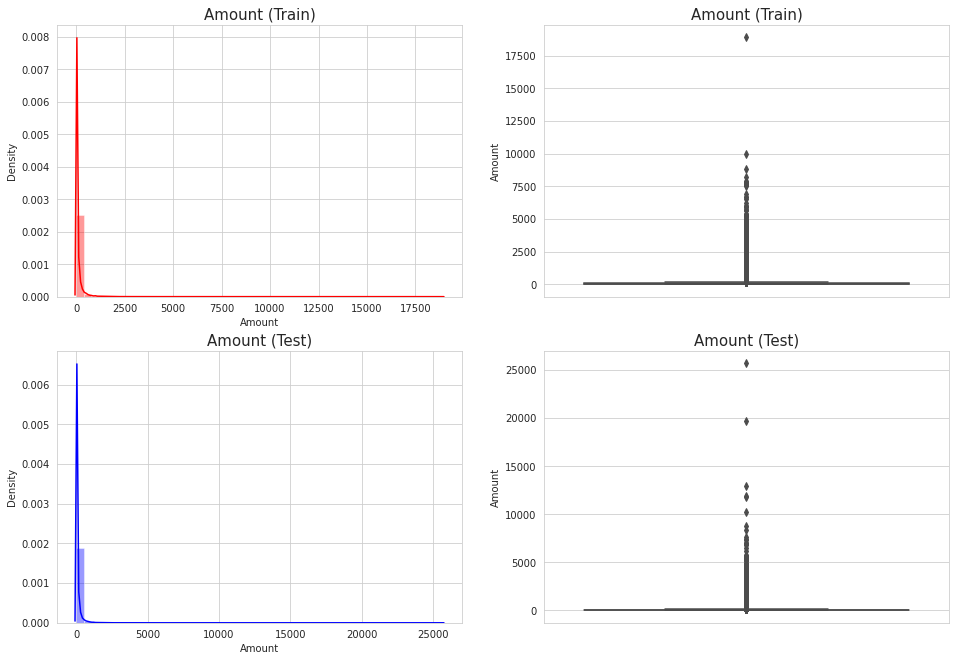

In [ ]:
plot_for_skewness('Amount')

#### Skewness noted in the Amount data variable

In [ ]:
# apply power-transformer for more gaussian
pt = PowerTransformer(copy=False)

X_train['Amount_pt'] = pt.fit_transform(X_train[['Amount']]) 
X_test['Amount_pt'] = pt.transform(X_test[['Amount']])

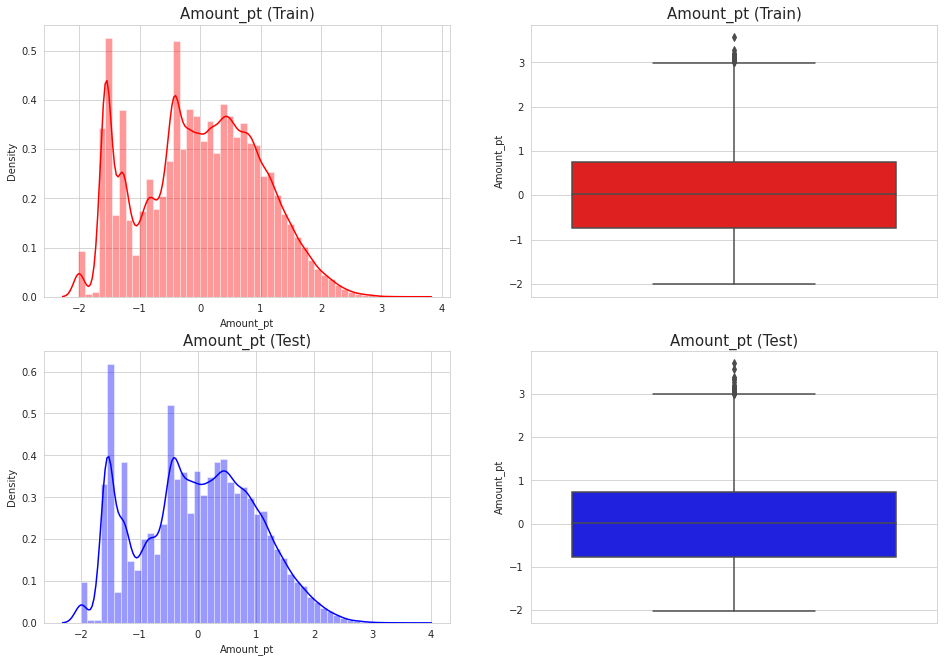

In [ ]:
# plotting the histogram of Amount feature from the dataset again to see the result 
plot_for_skewness('Amount_pt')

### Validating the skewness for other variables

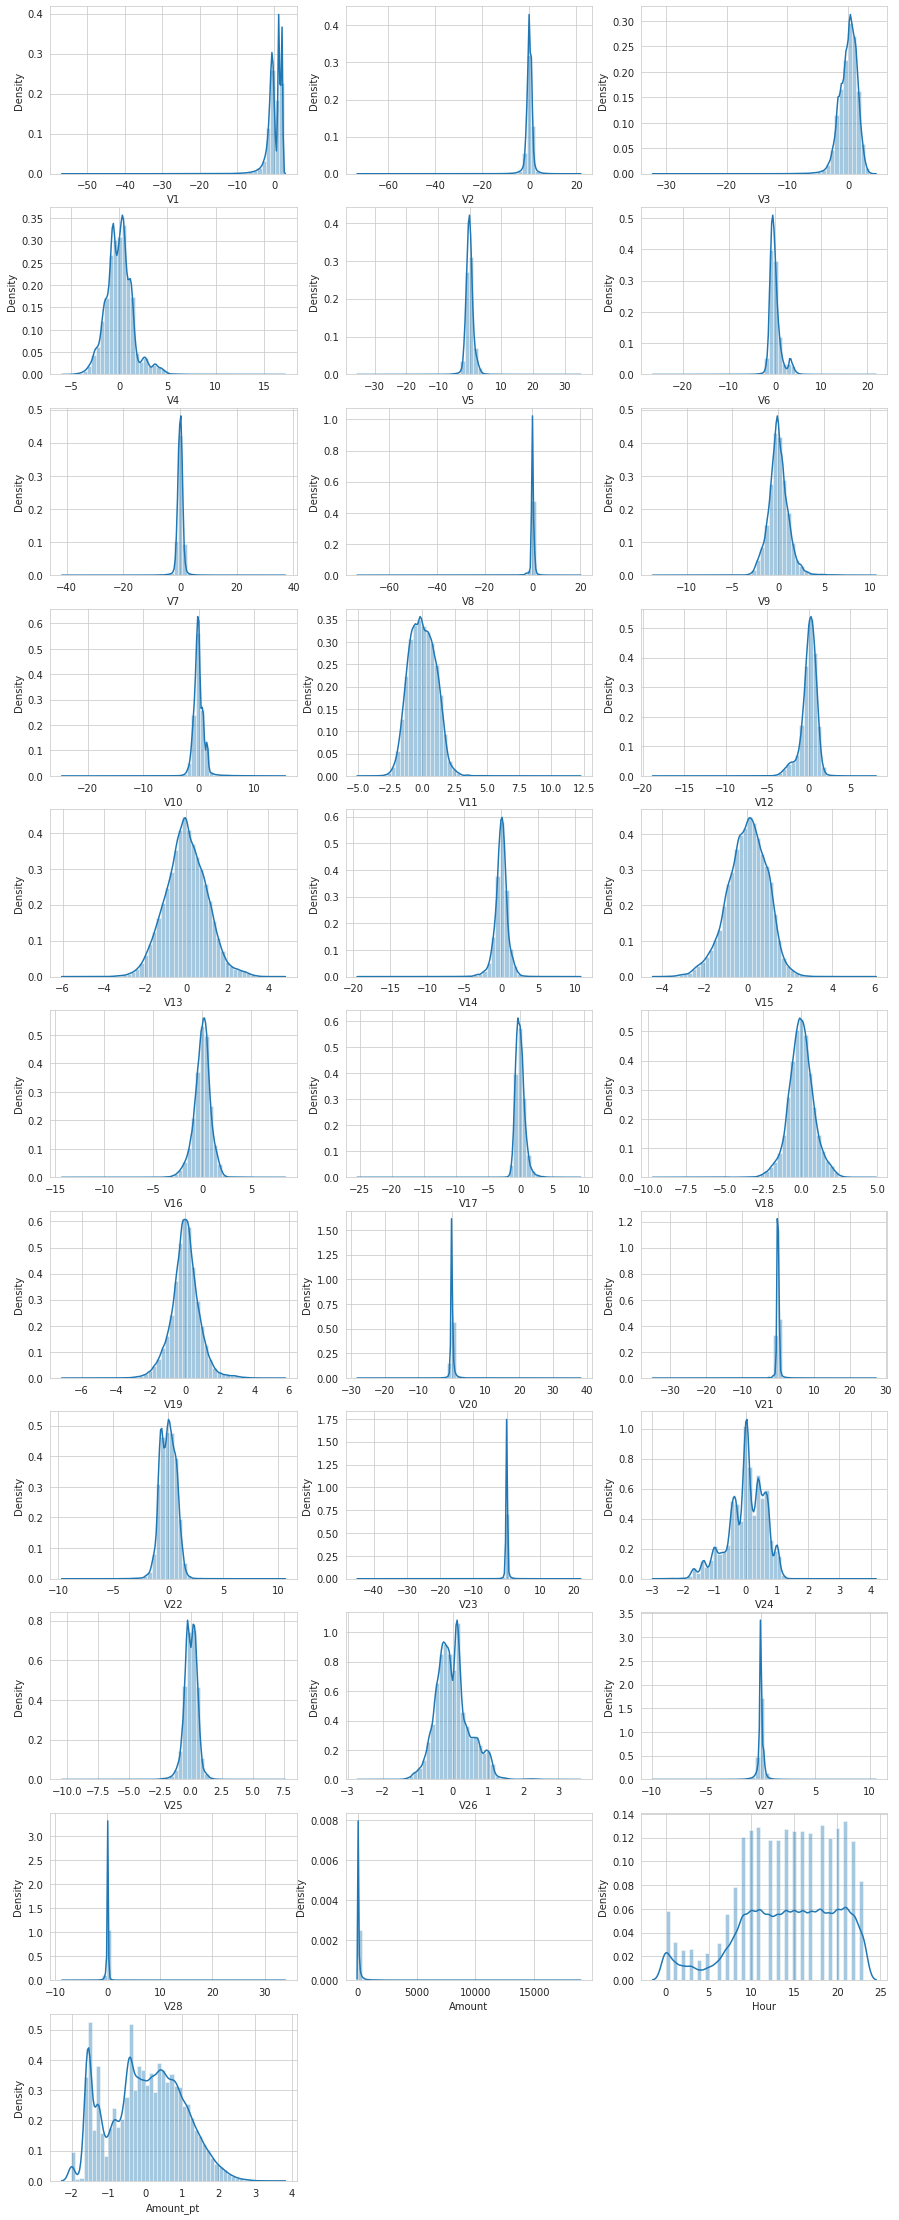

In [ ]:
# plot histogram of all the variables from the dataset to see the skewness

plt.figure(figsize=(15,40))


for k,v in enumerate(X_train.columns):
    plt.subplot(11,3,k+1)
    sns.distplot(X_train[v])    
plt.show()

In [ ]:
# dropping Amount_pt varibale from train & test set
X_train.drop('Amount_pt', axis=1, inplace=True)
X_test.drop('Amount_pt', axis=1, inplace=True)

In [ ]:
# transforming entire dataset
X_train_pt = pd.DataFrame(pt.fit_transform(X_train), columns=X_train.columns)
X_test_pt = pd.DataFrame(pt.transform(X_test), columns=X_test.columns)

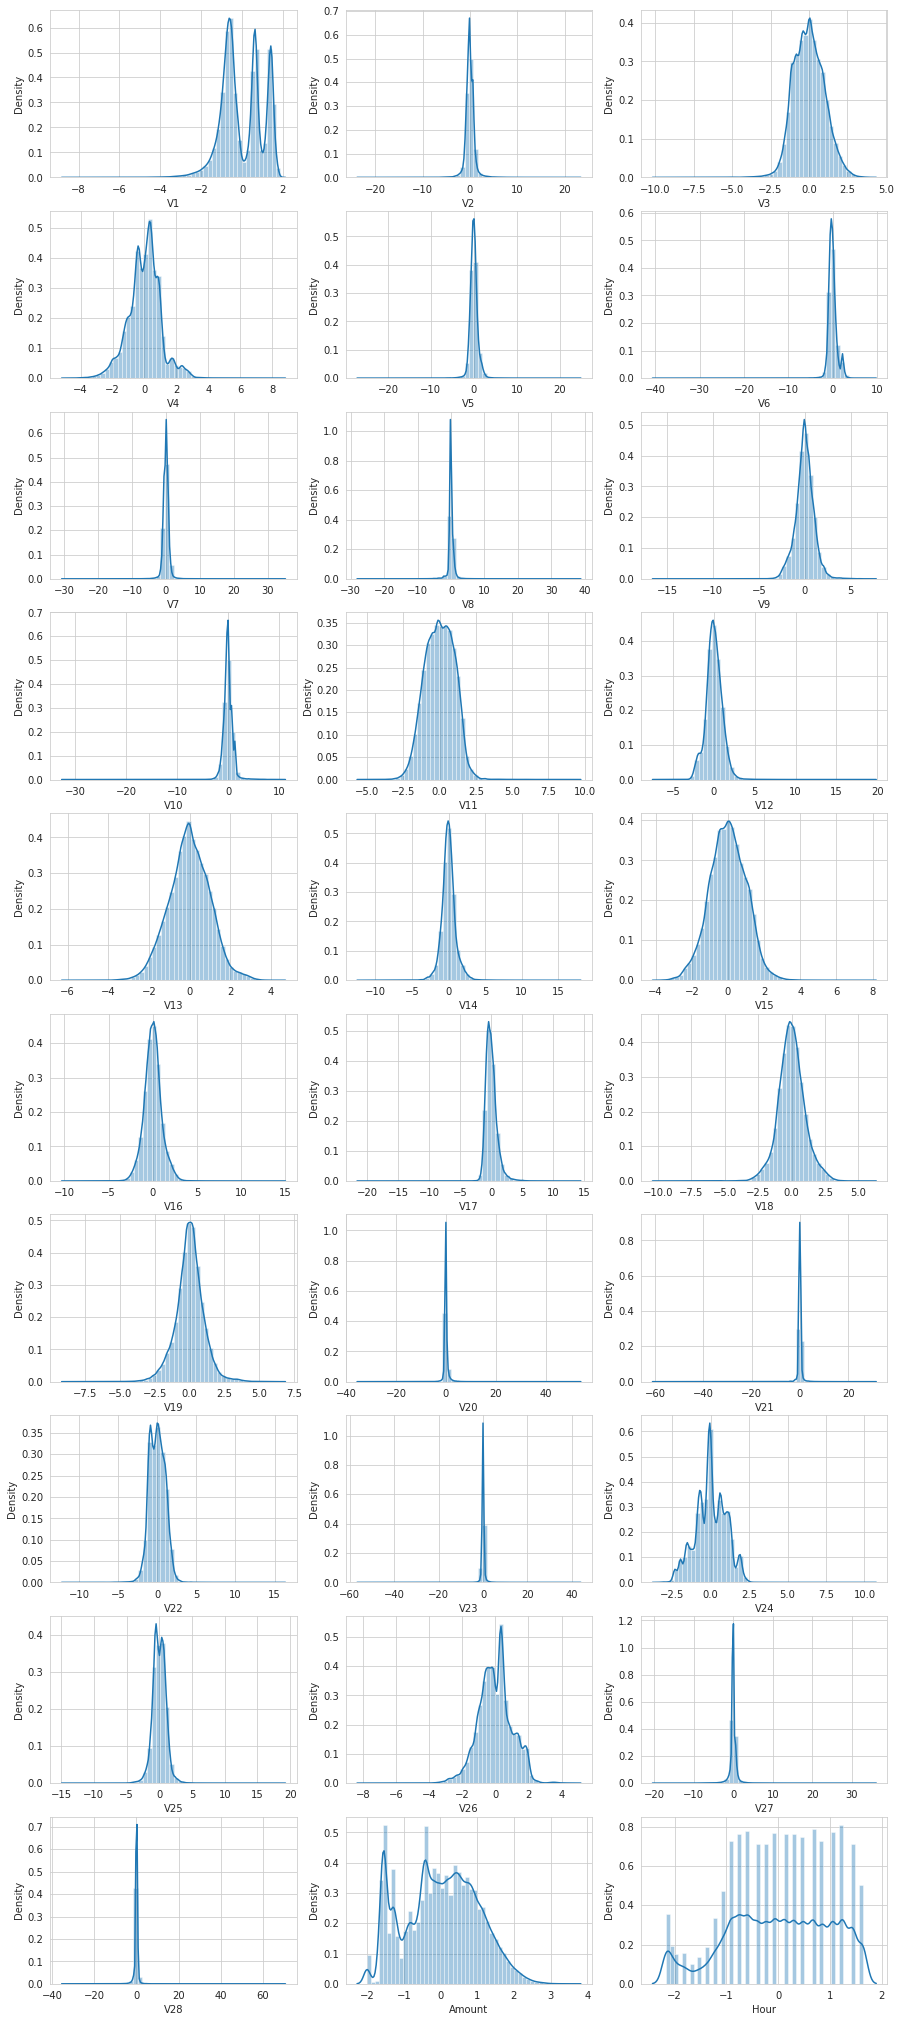

In [ ]:
# checking distributions of the predictors after transformation
plt.figure(figsize=(15,40))

for k,v in enumerate(X_train_pt.columns):
    plt.subplot(11,3,k+1)
    sns.distplot(X_train_pt[v])
    
plt.show()

#### Non-uniform distributions noted

In [ ]:
X_train_pt.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Hour
count,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05,1.986080e+05
mean,1.382888e-17,-5.577724e-18,4.967181e-17,1.597111e-17,1.104784e-17,-9.937382e-18,2.347921e-17,1.041309e-17,3.805687e-18,-4.473135e-18,7.264177e-17,-2.624180e-17,3.119008e-17,7.724292e-18,-1.292637e-17,3.481186e-18,3.480347e-18,8.419132e-18,-4.735363e-17,9.454299e-18,-1.560063e-17,3.848003e-17,-1.132427e-17,-2.375026e-17,-7.657771e-18,1.067694e-19,3.015817e-18,-2.859296e-19,6.090541e-16,9.945554e-16
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-8.568519e+00,-2.358408e+01,-9.921844e+00,-4.925749e+00,-2.691767e+01,-4.038297e+01,-3.050597e+01,-2.784728e+01,-1.632011e+01,-3.241099e+01,-5.439671e+00,-7.281996e+00,-6.030471e+00,-1.223918e+01,-3.912634e+00,-1.004758e+01,-2.133580e+01,-1.014014e+01,-8.926846e+00,-3.536725e+01,-6.075411e+01,-1.194518e+01,-5.645586e+01,-3.529811e+00,-1.466763e+01,-8.088764e+00,-2.013856e+01,-3.520825e+01,-2.012658e+00,-2.168154e+00
25%,-7.241658e-01,-4.581218e-01,-7.145478e-01,-5.689403e-01,-5.072859e-01,-5.552226e-01,-4.699923e-01,-2.780263e-01,-5.615237e-01,-4.767028e-01,-7.345235e-01,-5.872030e-01,-6.464068e-01,-5.197498e-01,-6.716473e-01,-6.024802e-01,-6.034345e-01,-6.089246e-01,-5.559034e-01,-2.856010e-01,-3.070272e-01,-7.576501e-01,-2.732168e-01,-6.601527e-01,-6.363943e-01,-6.506456e-01,-2.074809e-01,-1.545239e-01,-7.413837e-01,-7.483713e-01
50%,-2.496368e-01,-4.307861e-02,-2.253286e-02,6.330691e-02,-3.741356e-02,-1.197452e-01,2.126867e-02,-5.576506e-02,6.928269e-03,-4.363578e-02,1.242472e-02,-1.839916e-02,-2.800701e-03,-2.505081e-02,-3.372284e-03,-5.727329e-03,-1.188384e-01,-2.623186e-02,1.531890e-02,-8.789667e-02,-2.485150e-02,-6.448390e-03,-3.121544e-02,-3.035193e-02,-6.901048e-03,-1.628564e-02,-1.979560e-02,4.930161e-02,2.993923e-02,1.202364e-01
75%,7.352944e-01,4.774251e-01,6.753817e-01,5.834723e-01,4.508209e-01,4.059344e-01,4.679088e-01,2.570628e-01,5.819265e-01,4.635456e-01,7.469055e-01,6.094524e-01,6.700288e-01,4.870409e-01,6.919607e-01,5.681490e-01,4.556183e-01,5.853630e-01,5.698970e-01,1.726311e-01,2.755576e-01,7.229684e-01,2.275740e-01,7.061806e-01,6.589965e-01,5.776983e-01,2.155307e-01,2.589067e-01,7.507486e-01,8.607613e-01
max,1.864107e+00,2.318429e+01,4.121265e+00,8.562277e+00,2.464801e+01,9.606663e+00,3.499477e+01,3.856296e+01,7.536693e+00,1.101142e+01,9.472438e+00,1.963342e+01,4.459459e+00,1.782532e+01,7.937604e+00,1.474234e+01,1.416999e+01,6.066510e+00,6.612255e+00,5.384115e+01,3.136638e+01,1.611916e+01,4.375675e+01,1.050715e+01,1.901906e+01,4.903235e+00,3.589278e+01,7.041095e+01,3.564988e+00,1.634633e+00


## Model Building
- Case 1: Build different models on the **imbalanced dataset** and see the result
- Case 2: Build different models on the **balanced dataset** and see the result

### Building on the imbalanced dataset using Logistic Regression,KNN,Decision Tree,Random Forest and XGBoost

In [ ]:
# hyper-parameter tuning

def hyper_tuning(X_train, y_train, parameters, classifier, isStratified, isGridSearch):
    
    if isStratified:
      n_folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=4)
    else:
      n_folds = KFold(n_splits=3, shuffle=True, random_state=4)
    
    if isGridSearch:
      model_cv = GridSearchCV(estimator=classifier,    
                              param_grid=parameters,  
                              cv=n_folds,              
                              scoring='roc_auc',       
                              return_train_score=True, 
                              verbose=1,
                              n_jobs=-1                
                              )
    else:
      model_cv = RandomizedSearchCV(estimator=classifier,             
                                    param_distributions=parameters,   
                                    cv=n_folds,                       
                                    scoring='roc_auc',                
                                    return_train_score=True, 
                                    verbose=1,
                                    n_jobs=-1                         
                                  )

    
    model_cv.fit(X_train, y_train)
    
    
    return model_cv

In [ ]:
# printing relavant scores
def print_scores(model_name, y_true, y_pred, y_pred_prob):
    
    print('---' * 30)
    print(model_name + '\n')
    print('Confusion matrix:\n', metrics.confusion_matrix(y_true, y_pred))
    print()
    print('Recall Score: {:.4f}'.format(metrics.recall_score(y_true, y_pred)))
    print('Precision Score: {:.4f}'.format(metrics.precision_score(y_true, y_pred)))
    print('F1 Score: {:.4f}'.format(metrics.f1_score(y_true, y_pred)))
    print('Accuracy Score: {:.4f}'.format(metrics.accuracy_score(y_true, y_pred)))
    print("AUC: {:.4f}".format(metrics.roc_auc_score(y_true, y_pred_prob)))
    print('---' * 30)

    dict_scores = {'AUC':metrics.roc_auc_score(y_true, y_pred_prob),
                  'F1': metrics.f1_score(y_true, y_pred),
                  'Recall': metrics.recall_score(y_true, y_pred),
                  'Accuracy': metrics.roc_auc_score(y_true, y_pred_prob)
                  }

    return dict_scores

In [ ]:
# printing the best parameters for the models
def get_param_str(model, param_default):

  param_str = param_default
  for k,v in model.best_params_.items():
    param_str += ', '+ k + "=" + str(v)

  return param_str  

### Logistic Reg.

In [ ]:
classifier = LogisticRegression(class_weight=None)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10],  
              'penalty': ['l1', 'l2']               
             }

model_cv = hyper_tuning(X_train_pt, y_train, parameters, classifier, False, True)

 
print('---' * 30)
print("Best AUC: ", model_cv.best_score_)
print("Best hyper-parameters: ", model_cv.best_params_)
print('---' * 30)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.7s finished


------------------------------------------------------------------------------------------
Best AUC:  0.9784354300337244
Best hyper-parameters:  {'C': 0.01, 'penalty': 'l2'}
------------------------------------------------------------------------------------------


In [ ]:
y_train_pred = model_cv.predict(X_train_pt)
y_train_pred_prob = model_cv.predict_proba(X_train_pt)[:, 1]
y_test_pred = model_cv.predict(X_test_pt)
y_test_pred_prob = model_cv.predict_proba(X_test_pt)[:, 1]
y_test_pred_prob_lr = y_test_pred_prob

train_scores = print_scores('Logistic Reg.: Train Result', y_train, y_train_pred, y_train_pred_prob)
test_scores = print_scores('Logistic Reg.: Test Result', y_test, y_test_pred, y_test_pred_prob)

------------------------------------------------------------------------------------------
Logistic Reg.: Train Result

Confusion matrix:
 [[198251     26]
 [   135    196]]

Recall Score: 0.5921
Precision Score: 0.8829
F1 Score: 0.7089
Accuracy Score: 0.9992
AUC: 0.9808
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
Logistic Reg.: Test Result

Confusion matrix:
 [[84966    10]
 [   66    76]]

Recall Score: 0.5352
Precision Score: 0.8837
F1 Score: 0.6667
Accuracy Score: 0.9991
AUC: 0.9795
------------------------------------------------------------------------------------------


In [ ]:
results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'LR, Imbalanced, cutoff=0.5')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),3),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),3),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),3),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),3)})

results

,Model,AUC (Train),AUC (Test),F1 (Train),F1 (Test),Recall (Train),Recall (Test),Accuracy (Train),Accuracy (Test)
0,"LR, Imbalanced, cutoff=0.5, C=0.01, penalty=l2",0.98,0.98,0.71,0.667,0.59,0.535,0.98,0.98


AUC :good , Recall and F1-score : low. 

Finding the optimat cut-off as the predict() by default considers 0.5



`Create generic functions related to finding the optimal cut off point.`

In [ ]:
def get_df_with_probs(y_train, y_train_pred_prob, y_train_pred, y_test, y_test_pred_prob, y_test_pred):

  y_train_final = pd.DataFrame({ 'class_true': y_train.values,
                                 'class_prob': y_train_pred_prob,
                                 'class_pred': y_train_pred
                              })
  
  y_test_final = pd.DataFrame({ 'class_true': y_test.values,
                                'class_prob': y_test_pred_prob,
                                'class_pred': y_test_pred
                              })
  
  numbers = [float(x)/10 for x in range(10)]
  for i in numbers:
      y_train_final[i]= y_train_final['class_prob'].map(lambda x: 1 if x > i else 0)

  cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

  num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
  for i in num:
      cm1 = metrics.confusion_matrix(y_train_final['class_true'], y_train_final[i])
      total1=sum(sum(cm1))
      accuracy = (cm1[0,0]+cm1[1,1])/total1

      speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
      sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
      cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

  cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
  plt.show()

  return [y_train_final,y_test_final, cutoff_df]

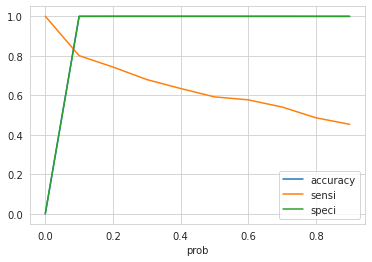

,prob,accuracy,sensi,speci
0.0,0.0,0.001667,1.000000,0.000000
0.1,0.1,0.999315,0.800604,0.999647
0.2,0.2,0.999391,0.743202,0.999818
0.3,0.3,0.999320,0.679758,0.999854
0.4,0.4,0.999250,0.634441,0.999859


In [ ]:
y_final = get_df_with_probs(y_train, y_train_pred_prob, y_train_pred, y_test, y_test_pred_prob, y_test_pred)
y_train_pred_final = y_final[0]
y_test_pred_final = y_final[1]
y_final[2].head()

#### Optimus cut-off : 0.1

In [ ]:
 
def print_predicted_by_cutoff(y_train_pred_final,y_test_pred_final, cutoff):
  y_train_pred_final['final_pred']= y_train_pred_final['class_prob'].map(lambda x: 1 if x > cutoff else 0)
  y_test_pred_final['final_pred']= y_test_pred_final['class_prob'].map(lambda x: 1 if x > cutoff else 0)
  print('---' * 30)
  print('--' *21 + 'Train' + '--' * 21)
  print('---' * 30)
  print(y_train_pred_final.head())
  print('---' * 30)
  print('---' * 30)
  print('--' *21 + 'Test' + '--' * 22)
  print('---' * 30)
  print(y_test_pred_final.head())
  print('---' * 30)

print_predicted_by_cutoff(y_train_pred_final,y_test_pred_final, 0.1) 
train_scores = print_scores('Logistic Regression: Train Result', y_train, y_train_pred_final['final_pred'], y_train_pred_prob)
test_scores = print_scores('Logistic Regression: Test Result', y_test, y_test_pred_final['final_pred'], y_test_pred_prob)

------------------------------------------------------------------------------------------
------------------------------------------Train------------------------------------------
------------------------------------------------------------------------------------------
   class_true  class_prob  class_pred  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0           0    0.000213           0    1    0    0    0    0    0    0    0   
1           0    0.000243           0    1    0    0    0    0    0    0    0   
2           0    0.000940           0    1    0    0    0    0    0    0    0   
3           0    0.000481           0    1    0    0    0    0    0    0    0   
4           0    0.000661           0    1    0    0    0    0    0    0    0   

   0.8  0.9  final_pred  
0    0    0           0  
1    0    0           0  
2    0    0           0  
3    0    0           0  
4    0    0           0  
-------------------------------------------------------------------------------------

In [ ]:
temp_results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'LR, Imbalanced, cutoff=0.1')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),2),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),2),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),2),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),2)})

results = pd.concat([results, temp_results])
results.reset_index(drop=True, inplace=True)
results

,Model,AUC (Train),AUC (Test),F1 (Train),F1 (Test),Recall (Train),Recall (Test),Accuracy (Train),Accuracy (Test)
0,"LR, Imbalanced, cutoff=0.5, C=0.01, penalty=l2",0.98,0.98,0.71,0.667,0.59,0.535,0.98,0.98
1,"LR, Imbalanced, cutoff=0.1, C=0.01, penalty=l2",0.98,0.98,0.80,0.770,0.80,0.760,0.98,0.98


In [ ]:
# generic function to draw roc curve
def draw_roc(model_type, actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label= model_type + ' (auc = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('Receiver operating characteristic', fontsize=16)
    plt.legend(loc="lower right") 
    plt.show()

    return None

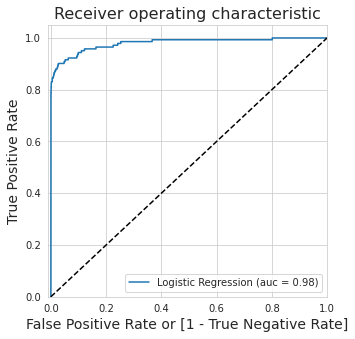

In [ ]:
draw_roc('Logistic Regression', y_test_pred_final['class_true'], y_test_pred_final['class_prob'])

### KNN

In [ ]:
classifier = KNeighborsClassifier()
parameters = {'n_neighbors': [3]  
             }
model_cv = hyper_tuning(X_train_pt, y_train, parameters, classifier, False, False) 


print('---' * 30)
print("Best AUC: ", model_cv.best_score_)
print("Best hyperparameters: ", model_cv.best_params_)
print('---' * 30)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 24.7min finished


------------------------------------------------------------------------------------------
Best AUC:  0.9199981120473678
Best hyperparameters:  {'n_neighbors': 3}
------------------------------------------------------------------------------------------


In [ ]:
y_train_pred = model_cv.predict(X_train_pt)
y_train_pred_prob = model_cv.predict_proba(X_train_pt)[:, 1]
y_test_pred = model_cv.predict(X_test_pt)
y_test_pred_prob = model_cv.predict_proba(X_test_pt)[:, 1]
y_test_pred_prob_knn = y_test_pred_prob

train_scores = print_scores('KNN: Train Result', y_train, y_train_pred, y_train_pred_prob)
test_scores = print_scores('KNN: Test Result', y_test, y_test_pred, y_test_pred_prob)

------------------------------------------------------------------------------------------
KNN: Train Result

Confusion matrix:
 [[198268      9]
 [    58    273]]

Recall Score: 0.8248
Precision Score: 0.9681
F1 Score: 0.8907
Accuracy Score: 0.9997
AUC: 1.0000
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
KNN: Test Result

Confusion matrix:
 [[84959    17]
 [   35   107]]

Recall Score: 0.7535
Precision Score: 0.8629
F1 Score: 0.8045
Accuracy Score: 0.9994
AUC: 0.8978
------------------------------------------------------------------------------------------


Checking accuracy, sensisitivity and specificity plot for the optimal cutoff

In [ ]:
temp_results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'KNN, Imbalanced, cutoff=0.5')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),2),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),2),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),2),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),2)})

results = pd.concat([results, temp_results])
results.reset_index(drop=True, inplace=True)
results

,Model,AUC (Train),AUC (Test),F1 (Train),F1 (Test),Recall (Train),Recall (Test),Accuracy (Train),Accuracy (Test)
0,"LR, Imbalanced, cutoff=0.5, C=0.01, penalty=l2",0.98,0.98,0.71,0.667,0.59,0.535,0.98,0.98
1,"LR, Imbalanced, cutoff=0.1, C=0.01, penalty=l2",0.98,0.98,0.80,0.770,0.80,0.760,0.98,0.98
2,"KNN, Imbalanced, cutoff=0.5, n_neighbors=3",1.00,0.90,0.89,0.800,0.82,0.750,1.00,0.90


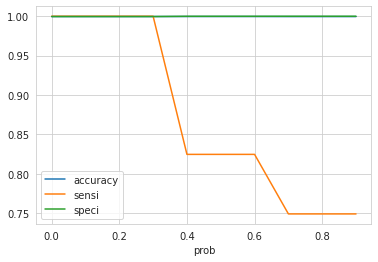

,prob,accuracy,sensi,speci
0.0,0.0,0.999632,1.000000,0.999632
0.1,0.1,0.999632,1.000000,0.999632
0.2,0.2,0.999632,1.000000,0.999632
0.3,0.3,0.999632,1.000000,0.999632
0.4,0.4,0.999663,0.824773,0.999955


In [ ]:
y_final = get_df_with_probs(y_train, y_train_pred_prob, y_train_pred, y_test, y_test_pred_prob, y_test_pred)
y_train_pred_final = y_final[0]
y_test_pred_final = y_final[1]
y_final[2].head()

#### Optimal cut-off based on the above curve is 0.3

In [ ]:
print_predicted_by_cutoff(y_train_pred_final,y_test_pred_final, 0.3)

------------------------------------------------------------------------------------------
------------------------------------------Train------------------------------------------
------------------------------------------------------------------------------------------
   class_true  class_prob  class_pred  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0           0         0.0           0    0    0    0    0    0    0    0    0   
1           0         0.0           0    0    0    0    0    0    0    0    0   
2           0         0.0           0    0    0    0    0    0    0    0    0   
3           0         0.0           0    0    0    0    0    0    0    0    0   
4           0         0.0           0    0    0    0    0    0    0    0    0   

   0.8  0.9  final_pred  
0    0    0           0  
1    0    0           0  
2    0    0           0  
3    0    0           0  
4    0    0           0  
-------------------------------------------------------------------------------------

In [ ]:
train_scores = print_scores('KNN : Train Result', y_train, y_train_pred_final['final_pred'], y_train_pred_prob)
test_scores = print_scores('KNN: Test Result', y_test, y_test_pred_final['final_pred'], y_test_pred_prob)

------------------------------------------------------------------------------------------
KNN : Train Result

Confusion matrix:
 [[198204     73]
 [     0    331]]

Recall Score: 1.0000
Precision Score: 0.8193
F1 Score: 0.9007
Accuracy Score: 0.9996
AUC: 1.0000
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
KNN: Test Result

Confusion matrix:
 [[84925    51]
 [   29   113]]

Recall Score: 0.7958
Precision Score: 0.6890
F1 Score: 0.7386
Accuracy Score: 0.9991
AUC: 0.8978
------------------------------------------------------------------------------------------


In [ ]:
temp_results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'KNN, Imbalanced, cutoff=0.3')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),2),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),2),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),2),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),2)})

results = pd.concat([results, temp_results])
results.reset_index(drop=True, inplace=True)
results

,Model,AUC (Train),AUC (Test),F1 (Train),F1 (Test),Recall (Train),Recall (Test),Accuracy (Train),Accuracy (Test)
0,"LR, Imbalanced, cutoff=0.5, C=0.01, penalty=l2",0.98,0.98,0.71,0.667,0.59,0.535,0.98,0.98
1,"LR, Imbalanced, cutoff=0.1, C=0.01, penalty=l2",0.98,0.98,0.80,0.770,0.80,0.760,0.98,0.98
2,"KNN, Imbalanced, cutoff=0.5, n_neighbors=3",1.00,0.90,0.89,0.800,0.82,0.750,1.00,0.90
3,"KNN, Imbalanced, cutoff=0.3, n_neighbors=3",1.00,0.90,0.90,0.740,1.00,0.800,1.00,0.90


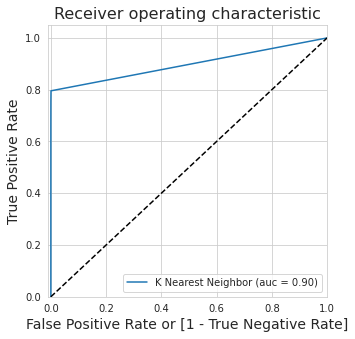

In [ ]:
draw_roc('K Nearest Neighbor', y_test, y_test_pred_prob)

### Decision Trees

Finding the optimal ranges of below hyperparamters individually and then find the best hyperparameters to build the model:
- max_depth
- min_samples_leaf
- min_samples_split

In [ ]:
 def plot_scores(scores, param_name):
    param = 'param_' + param_name
    plt.figure(figsize=(14,8))
    plt.plot(scores[param], 
             scores["mean_train_score"], 
             label="Training score-auc")
    plt.plot(scores[param], 
             scores["mean_test_score"], 
             label="Test score - auc")
    plt.xlabel(param_name)
    plt.ylabel("roc-auc")
    plt.legend(loc='best')
    plt.title('Test-Train score w.r.t ' + param_name, fontsize='x-large')
    plt.show()

In [ ]:
classifier = DecisionTreeClassifier(class_weight=None, random_state=100)
parameters = {'max_depth': list(range(2, 10, 1)), 
             'criterion': ['gini']}               

model_cv = hyper_tuning(X_train_pt, y_train, parameters, classifier, False, True)  
print('---' * 30)
print("Best AUC: ", model_cv.best_score_)
print("Best hyperparameters: ", model_cv.best_params_)
print('---' * 30)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   28.7s finished


------------------------------------------------------------------------------------------
Best AUC:  0.9015550823238724
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 4}
------------------------------------------------------------------------------------------


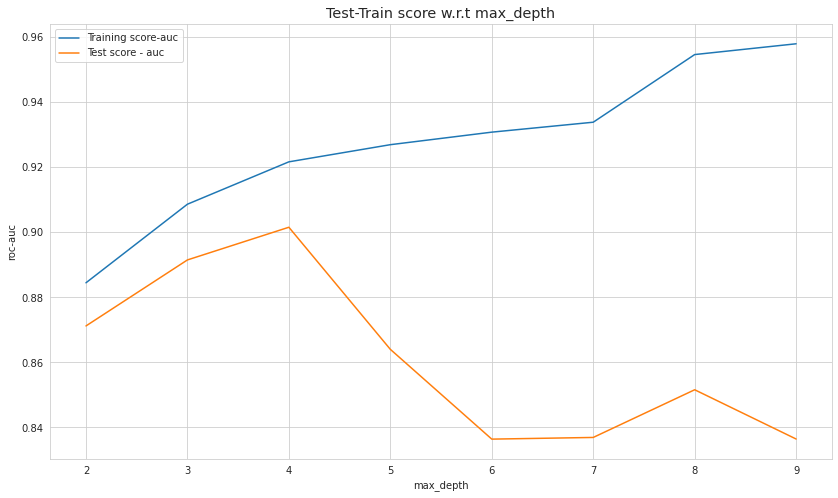

In [ ]:
scores = model_cv.cv_results_
plot_scores(scores, 'max_depth')

With the increae in the   max_depth , the test and train scores start to overfit 


### 'min_samples_leaf' hyperparameter tuning

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   47.1s finished


------------------------------------------------------------------------------------------
Best AUC:  0.912558797989445
Best hyperparameters:  {'criterion': 'gini', 'min_samples_leaf': 8}
------------------------------------------------------------------------------------------


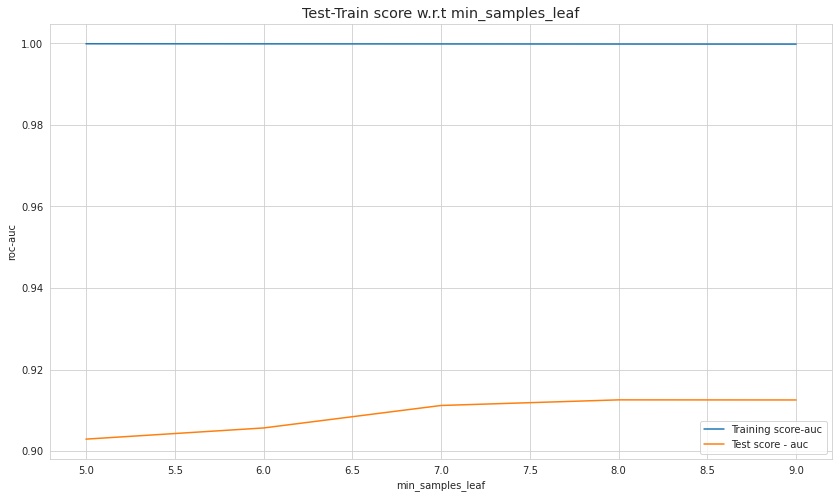

In [ ]:
classifier = DecisionTreeClassifier(class_weight=None, random_state=100)
parameters = {'min_samples_leaf': list(range(5, 10, 1)),  
             'criterion': ['gini']}                       
model_cv = hyper_tuning(X_train_pt, y_train, parameters, classifier, False, True)  

 
print('---' * 30)
print("Best AUC: ", model_cv.best_score_)
print("Best hyperparameters: ", model_cv.best_params_)
print('---' * 30)
scores = model_cv.cv_results_
plot_scores(scores, 'min_samples_leaf')

With the increase in the min samples in leaf,score improves

### 'min_samples_split' hyperparameter tuning

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   46.7s finished


------------------------------------------------------------------------------------------
Best AUC:  0.8904568386134065
Best hyperparameters:  {'criterion': 'gini', 'min_samples_split': 9}
------------------------------------------------------------------------------------------


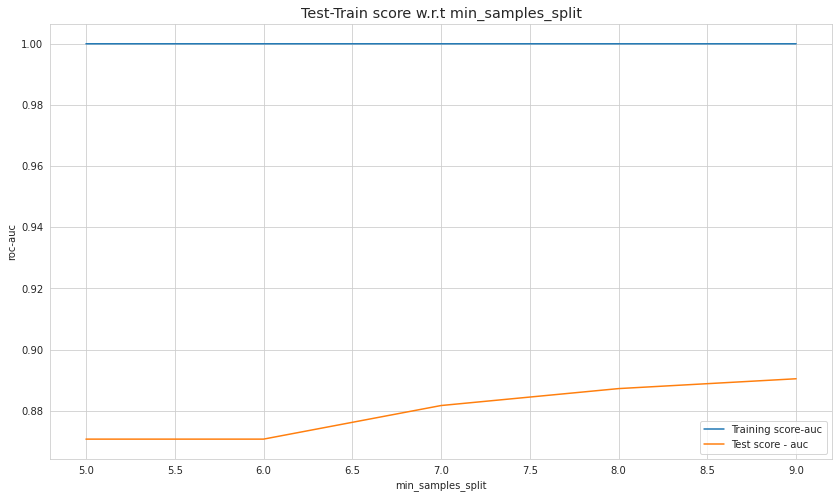

In [ ]:
classifier = DecisionTreeClassifier(class_weight=None, random_state=100)
parameters = {'min_samples_split': list(range(5, 10, 1)),  
             'criterion': ['gini']}                          

model_cv = hyper_tuning(X_train_pt, y_train, parameters, classifier, False, True)  
print('---' * 30)
print("Best AUC: ", model_cv.best_score_)
print("Best hyperparameters: ", model_cv.best_params_)
print('---' * 30)
scores = model_cv.cv_results_
plot_scores(scores, 'min_samples_split')

With the increase in the min samples splits , the tree tends to become less complex i.e. the complexity decreases

### Building Decision tree with optimal ranges of hyper-parameters

In [ ]:
classifier = DecisionTreeClassifier(class_weight=None, random_state=100)
parameters = {
    'max_depth': list(range(2, 4, 1)),           
    'min_samples_leaf': list(range(7, 10, 1)),   
    'min_samples_split': list(range(7, 10, 1)),  
    'criterion': ['entropy','gini']}             

model_cv = hyper_tuning(X_train_pt, y_train, parameters, classifier, False, True) 
print('---' * 30)
print("Best AUC: ", model_cv.best_score_)
print("Best hyperparameters: ", model_cv.best_params_)
print('---' * 30)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  1.2min finished


------------------------------------------------------------------------------------------
Best AUC:  0.9289918772621432
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 7, 'min_samples_split': 7}
------------------------------------------------------------------------------------------


In [ ]:
y_train_pred = model_cv.predict(X_train_pt)
y_train_pred_prob = model_cv.predict_proba(X_train_pt)[:, 1]
y_test_pred = model_cv.predict(X_test_pt)
y_test_pred_prob = model_cv.predict_proba(X_test_pt)[:, 1]
y_test_pred_prob_dt = y_test_pred_prob

train_scores = print_scores('Decision Tree: Train Result', y_train, y_train_pred, y_train_pred_prob)
test_scores = print_scores('Decision Tree: Test Result', y_test, y_test_pred, y_test_pred_prob)

------------------------------------------------------------------------------------------
Decision Tree: Train Result

Confusion matrix:
 [[198235     42]
 [    64    267]]

Recall Score: 0.8066
Precision Score: 0.8641
F1 Score: 0.8344
Accuracy Score: 0.9995
AUC: 0.9528
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
Decision Tree: Test Result

Confusion matrix:
 [[84952    24]
 [   34   108]]

Recall Score: 0.7606
Precision Score: 0.8182
F1 Score: 0.7883
Accuracy Score: 0.9993
AUC: 0.9463
------------------------------------------------------------------------------------------


Checking  accuracy, sesisitivity & specificity plot for the optimal cutoff

In [ ]:
temp_results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'DT, Imbalanced, cutoff=0.5')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),2),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),2),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),2),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),2)})

results = pd.concat([results, temp_results])
results.reset_index(drop=True, inplace=True)
results

,Model,AUC (Train),AUC (Test),F1 (Train),F1 (Test),Recall (Train),Recall (Test),Accuracy (Train),Accuracy (Test)
0,"LR, Imbalanced, cutoff=0.5, C=0.01, penalty=l2",0.98,0.98,0.71,0.667,0.59,0.535,0.98,0.98
1,"LR, Imbalanced, cutoff=0.1, C=0.01, penalty=l2",0.98,0.98,0.80,0.770,0.80,0.760,0.98,0.98
2,"KNN, Imbalanced, cutoff=0.5, n_neighbors=3",1.00,0.90,0.89,0.800,0.82,0.750,1.00,0.90
3,"KNN, Imbalanced, cutoff=0.3, n_neighbors=3",1.00,0.90,0.90,0.740,1.00,0.800,1.00,0.90
4,"DT, Imbalanced, cutoff=0.5, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.790,0.81,0.760,0.95,0.95


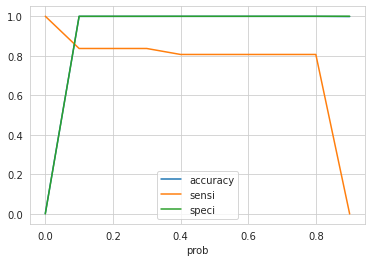

,prob,accuracy,sensi,speci
0.0,0.0,0.001798,1.000000,0.000131
0.1,0.1,0.999421,0.836858,0.999692
0.2,0.2,0.999421,0.836858,0.999692
0.3,0.3,0.999421,0.836858,0.999692
0.4,0.4,0.999466,0.806647,0.999788


In [ ]:
y_final = get_df_with_probs(y_train, y_train_pred_prob, y_train_pred, y_test, y_test_pred_prob, y_test_pred)
y_train_pred_final = y_final[0]
y_test_pred_final = y_final[1]
y_final[2].head()

#### Optimum cut-off probability is 0.1 as per the above obtained graph

In [ ]:
 print_predicted_by_cutoff(y_train_pred_final,y_test_pred_final, 0.1)

------------------------------------------------------------------------------------------
------------------------------------------Train------------------------------------------
------------------------------------------------------------------------------------------
   class_true  class_prob  class_pred  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0           0    0.000148           0    1    0    0    0    0    0    0    0   
1           0    0.000148           0    1    0    0    0    0    0    0    0   
2           0    0.000148           0    1    0    0    0    0    0    0    0   
3           0    0.000148           0    1    0    0    0    0    0    0    0   
4           0    0.001507           0    1    0    0    0    0    0    0    0   

   0.8  0.9  final_pred  
0    0    0           0  
1    0    0           0  
2    0    0           0  
3    0    0           0  
4    0    0           0  
-------------------------------------------------------------------------------------

In [ ]:
train_scores = print_scores('Decision Tree: Train Result', y_train, y_train_pred_final['final_pred'], y_train_pred_prob)
test_scores = print_scores('Decision Tree: Test Result', y_test, y_test_pred_final['final_pred'], y_test_pred_prob)

------------------------------------------------------------------------------------------
Decision Tree: Train Result

Confusion matrix:
 [[198216     61]
 [    54    277]]

Recall Score: 0.8369
Precision Score: 0.8195
F1 Score: 0.8281
Accuracy Score: 0.9994
AUC: 0.9528
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
Decision Tree: Test Result

Confusion matrix:
 [[84939    37]
 [   28   114]]

Recall Score: 0.8028
Precision Score: 0.7550
F1 Score: 0.7782
Accuracy Score: 0.9992
AUC: 0.9463
------------------------------------------------------------------------------------------


In [ ]:
temp_results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'DT, Imbalanced, cutoff=0.1')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),2),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),2),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),2),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),2)})

results = pd.concat([results, temp_results])
results.reset_index(drop=True, inplace=True)
results

,Model,AUC (Train),AUC (Test),F1 (Train),F1 (Test),Recall (Train),Recall (Test),Accuracy (Train),Accuracy (Test)
0,"LR, Imbalanced, cutoff=0.5, C=0.01, penalty=l2",0.98,0.98,0.71,0.667,0.59,0.535,0.98,0.98
1,"LR, Imbalanced, cutoff=0.1, C=0.01, penalty=l2",0.98,0.98,0.80,0.770,0.80,0.760,0.98,0.98
2,"KNN, Imbalanced, cutoff=0.5, n_neighbors=3",1.00,0.90,0.89,0.800,0.82,0.750,1.00,0.90
3,"KNN, Imbalanced, cutoff=0.3, n_neighbors=3",1.00,0.90,0.90,0.740,1.00,0.800,1.00,0.90
4,"DT, Imbalanced, cutoff=0.5, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.790,0.81,0.760,0.95,0.95
5,"DT, Imbalanced, cutoff=0.1, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.780,0.84,0.800,0.95,0.95


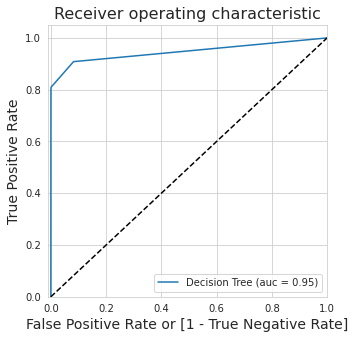

In [ ]:
draw_roc('Decision Tree', y_test, y_test_pred_prob)

### Random Forest

Hyper-parameters to tune with:
- n_estimators
- max_features


In [ ]:
classifier = RandomForestClassifier(class_weight=None, random_state=100)

parameters = {
    'max_depth': [3],              # max depth of the tree
    'min_samples_leaf': [7],       # min samples in leaf to split the node of the tree
    'min_samples_split': [7],      # min samples in a node to split the node of the tree
    'criterion': ['entropy'],      # homogeneity measure
    'n_estimators': [200, 300],    # No. of trees
    'max_features': [15,20]        # Max no. of features to consider for a split
    }                   

model_cv = hyper_tuning(X_train_pt, y_train, parameters, classifier, False, False) # KFold & Randomized Search

# print best hyperparameters
print('---' * 20)
print("Best AUC: ", model_cv.best_score_)
print("Best hyperparameters: ", model_cv.best_params_)
print('---' * 20)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 18.4min finished


------------------------------------------------------------
Best AUC:  0.9739810423874463
Best hyperparameters:  {'n_estimators': 300, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 20, 'max_depth': 3, 'criterion': 'entropy'}
------------------------------------------------------------


In [ ]:
y_train_pred = model_cv.predict(X_train_pt)
y_train_pred_prob = model_cv.predict_proba(X_train_pt)[:, 1]
y_test_pred = model_cv.predict(X_test_pt)
y_test_pred_prob = model_cv.predict_proba(X_test_pt)[:, 1]
y_test_pred_prob_rf = y_test_pred_prob
train_scores = print_scores('Random Forest: Train Result', y_train, y_train_pred, y_train_pred_prob)
test_scores = print_scores('Random Forest: Test Result', y_test, y_test_pred, y_test_pred_prob)

------------------------------------------------------------------------------------------
Random Forest: Train Result

Confusion matrix:
 [[198236     41]
 [    59    272]]

Recall Score: 0.8218
Precision Score: 0.8690
F1 Score: 0.8447
Accuracy Score: 0.9995
AUC: 0.9838
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
Random Forest: Test Result

Confusion matrix:
 [[84951    25]
 [   34   108]]

Recall Score: 0.7606
Precision Score: 0.8120
F1 Score: 0.7855
Accuracy Score: 0.9993
AUC: 0.9783
------------------------------------------------------------------------------------------


In [ ]:
temp_results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'RF, Imbalanced, cutoff=0.5')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),2),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),2),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),2),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),2)})

results = pd.concat([results, temp_results])
results.reset_index(drop=True, inplace=True)
results

,Model,AUC (Train),AUC (Test),F1 (Train),F1 (Test),Recall (Train),Recall (Test),Accuracy (Train),Accuracy (Test)
0,"LR, Imbalanced, cutoff=0.5, C=0.01, penalty=l2",0.98,0.98,0.71,0.667,0.59,0.535,0.98,0.98
1,"LR, Imbalanced, cutoff=0.1, C=0.01, penalty=l2",0.98,0.98,0.80,0.770,0.80,0.760,0.98,0.98
2,"KNN, Imbalanced, cutoff=0.5, n_neighbors=3",1.00,0.90,0.89,0.800,0.82,0.750,1.00,0.90
3,"KNN, Imbalanced, cutoff=0.3, n_neighbors=3",1.00,0.90,0.90,0.740,1.00,0.800,1.00,0.90
4,"DT, Imbalanced, cutoff=0.5, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.790,0.81,0.760,0.95,0.95
5,"DT, Imbalanced, cutoff=0.1, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.780,0.84,0.800,0.95,0.95
6,"RF, Imbalanced, cutoff=0.5, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.84,0.790,0.82,0.760,0.98,0.98


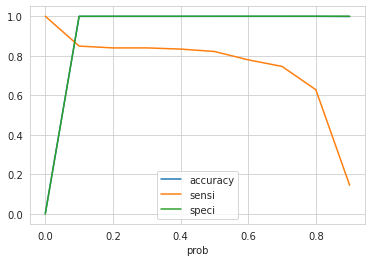

,prob,accuracy,sensi,speci
0.0,0.0,0.001667,1.000000,0.000000
0.1,0.1,0.999366,0.848943,0.999617
0.2,0.2,0.999416,0.839879,0.999682
0.3,0.3,0.999426,0.839879,0.999692
0.4,0.4,0.999441,0.833837,0.999718


In [ ]:
y_final = get_df_with_probs(y_train, y_train_pred_prob, y_train_pred, y_test, y_test_pred_prob, y_test_pred)
y_train_pred_final = y_final[0]
y_test_pred_final = y_final[1]
y_final[2].head()

In [ ]:
# final predicted values based on the cutoff
print_predicted_by_cutoff(y_train_pred_final,y_test_pred_final, 0.1)

------------------------------------------------------------------------------------------
------------------------------------------Train------------------------------------------
------------------------------------------------------------------------------------------
   class_true  class_prob  class_pred  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0           0    0.000167           0    1    0    0    0    0    0    0    0   
1           0    0.000337           0    1    0    0    0    0    0    0    0   
2           0    0.000324           0    1    0    0    0    0    0    0    0   
3           0    0.000302           0    1    0    0    0    0    0    0    0   
4           0    0.000721           0    1    0    0    0    0    0    0    0   

   0.8  0.9  final_pred  
0    0    0           0  
1    0    0           0  
2    0    0           0  
3    0    0           0  
4    0    0           0  
-------------------------------------------------------------------------------------

In [ ]:
train_scores = print_scores('Random Forest: Train Result', y_train, y_train_pred_final['final_pred'], y_train_pred_prob)
test_scores = print_scores('Random Forest: Test Result', y_test, y_test_pred_final['final_pred'], y_test_pred_prob)

------------------------------------------------------------------------------------------
Random Forest: Train Result

Confusion matrix:
 [[198201     76]
 [    50    281]]

Recall Score: 0.8489
Precision Score: 0.7871
F1 Score: 0.8169
Accuracy Score: 0.9994
AUC: 0.9838
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
Random Forest: Test Result

Confusion matrix:
 [[84927    49]
 [   28   114]]

Recall Score: 0.8028
Precision Score: 0.6994
F1 Score: 0.7475
Accuracy Score: 0.9991
AUC: 0.9783
------------------------------------------------------------------------------------------


In [ ]:
temp_results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'RF, Imbalanced, cutoff=0.1')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),2),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),2),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),2),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),2)})

results = pd.concat([results, temp_results])
results.reset_index(drop=True, inplace=True)
results

,Model,AUC (Train),AUC (Test),F1 (Train),F1 (Test),Recall (Train),Recall (Test),Accuracy (Train),Accuracy (Test)
0,"LR, Imbalanced, cutoff=0.5, C=0.01, penalty=l2",0.98,0.98,0.71,0.667,0.59,0.535,0.98,0.98
1,"LR, Imbalanced, cutoff=0.1, C=0.01, penalty=l2",0.98,0.98,0.80,0.770,0.80,0.760,0.98,0.98
2,"KNN, Imbalanced, cutoff=0.5, n_neighbors=3",1.00,0.90,0.89,0.800,0.82,0.750,1.00,0.90
3,"KNN, Imbalanced, cutoff=0.3, n_neighbors=3",1.00,0.90,0.90,0.740,1.00,0.800,1.00,0.90
4,"DT, Imbalanced, cutoff=0.5, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.790,0.81,0.760,0.95,0.95
5,"DT, Imbalanced, cutoff=0.1, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.780,0.84,0.800,0.95,0.95
6,"RF, Imbalanced, cutoff=0.5, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.84,0.790,0.82,0.760,0.98,0.98
7,"RF, Imbalanced, cutoff=0.1, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.82,0.750,0.85,0.800,0.98,0.98


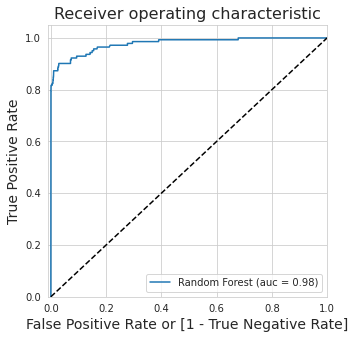

In [ ]:
draw_roc('Random Forest', y_test, y_test_pred_prob)

### XGBoost

In [ ]:
classifier = XGBClassifier(class_weight=None, random_state=100)

parameters = {
    'max_depth': [3,4,5],               
    'learning_rate': [0.03,0.05,0.07]   
    }                   

model_cv = hyper_tuning(X_train_pt, y_train, parameters, classifier, False, False) 
print('---' * 30)
print("Best AUC: ", model_cv.best_score_)
print("Best hyper-parameters: ", model_cv.best_params_)
print('---' * 30)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  4.9min finished


------------------------------------------------------------------------------------------
Best AUC:  0.9669120136225322
Best hyper-parameters:  {'max_depth': 3, 'learning_rate': 0.07}
------------------------------------------------------------------------------------------


In [ ]:
y_train_pred = model_cv.predict(X_train_pt)
y_train_pred_prob = model_cv.predict_proba(X_train_pt)[:, 1]
y_test_pred = model_cv.predict(X_test_pt)
y_test_pred_prob = model_cv.predict_proba(X_test_pt)[:, 1]
y_test_pred_prob_xgb = y_test_pred_prob
train_scores = print_scores('XGBoost: Train Result', y_train, y_train_pred, y_train_pred_prob)
test_scores = print_scores('XGBoost: Test Result', y_test, y_test_pred, y_test_pred_prob)

------------------------------------------------------------------------------------------
XGBoost: Train Result

Confusion matrix:
 [[198270      7]
 [    54    277]]

Recall Score: 0.8369
Precision Score: 0.9754
F1 Score: 0.9008
Accuracy Score: 0.9997
AUC: 0.9919
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
XGBoost: Test Result

Confusion matrix:
 [[84958    18]
 [   34   108]]

Recall Score: 0.7606
Precision Score: 0.8571
F1 Score: 0.8060
Accuracy Score: 0.9994
AUC: 0.9775
------------------------------------------------------------------------------------------


In [ ]:
temp_results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'XGB, Imbalanced, cutoff=0.5')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),2),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),2),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),2),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),2)})

results = pd.concat([results, temp_results])
results.reset_index(drop=True, inplace=True)
results

,Model,AUC (Train),AUC (Test),F1 (Train),F1 (Test),Recall (Train),Recall (Test),Accuracy (Train),Accuracy (Test)
0,"LR, Imbalanced, cutoff=0.5, C=0.01, penalty=l2",0.98,0.98,0.71,0.667,0.59,0.535,0.98,0.98
1,"LR, Imbalanced, cutoff=0.1, C=0.01, penalty=l2",0.98,0.98,0.80,0.770,0.80,0.760,0.98,0.98
2,"KNN, Imbalanced, cutoff=0.5, n_neighbors=3",1.00,0.90,0.89,0.800,0.82,0.750,1.00,0.90
3,"KNN, Imbalanced, cutoff=0.3, n_neighbors=3",1.00,0.90,0.90,0.740,1.00,0.800,1.00,0.90
4,"DT, Imbalanced, cutoff=0.5, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.790,0.81,0.760,0.95,0.95
5,"DT, Imbalanced, cutoff=0.1, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.780,0.84,0.800,0.95,0.95
6,"RF, Imbalanced, cutoff=0.5, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.84,0.790,0.82,0.760,0.98,0.98
7,"RF, Imbalanced, cutoff=0.1, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.82,0.750,0.85,0.800,0.98,0.98
8,"XGB, Imbalanced, cutoff=0.5, max_depth=3, learning_rate=0.07",0.99,0.98,0.90,0.810,0.84,0.760,0.99,0.98


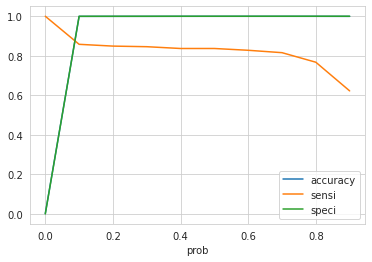

,prob,accuracy,sensi,speci
0.0,0.0,0.001667,1.000000,0.000000
0.1,0.1,0.999436,0.858006,0.999672
0.2,0.2,0.999502,0.848943,0.999753
0.3,0.3,0.999542,0.845921,0.999798
0.4,0.4,0.999658,0.836858,0.999929


In [ ]:
y_final = get_df_with_probs(y_train, y_train_pred_prob, y_train_pred, y_test, y_test_pred_prob, y_test_pred)
y_train_pred_final = y_final[0]
y_test_pred_final = y_final[1]
y_final[2].head()

In [ ]:
# final predicted values based on the cutoff
print_predicted_by_cutoff(y_train_pred_final,y_test_pred_final, 0.1)

------------------------------------------------------------------------------------------
------------------------------------------Train------------------------------------------
------------------------------------------------------------------------------------------
   class_true  class_prob  class_pred  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0           0    0.000534           0    1    0    0    0    0    0    0    0   
1           0    0.000534           0    1    0    0    0    0    0    0    0   
2           0    0.001832           0    1    0    0    0    0    0    0    0   
3           0    0.000868           0    1    0    0    0    0    0    0    0   
4           0    0.000840           0    1    0    0    0    0    0    0    0   

   0.8  0.9  final_pred  
0    0    0           0  
1    0    0           0  
2    0    0           0  
3    0    0           0  
4    0    0           0  
-------------------------------------------------------------------------------------

In [ ]:
train_scores = print_scores('XG Boost: Train Result', y_train, y_train_pred_final['final_pred'], y_train_pred_prob)
test_scores = print_scores('XG Boost: Test Result', y_test, y_test_pred_final['final_pred'], y_test_pred_prob)

------------------------------------------------------------------------------------------
XG Boost: Train Result

Confusion matrix:
 [[198212     65]
 [    47    284]]

Recall Score: 0.8580
Precision Score: 0.8138
F1 Score: 0.8353
Accuracy Score: 0.9994
AUC: 0.9919
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
XG Boost: Test Result

Confusion matrix:
 [[84939    37]
 [   27   115]]

Recall Score: 0.8099
Precision Score: 0.7566
F1 Score: 0.7823
Accuracy Score: 0.9992
AUC: 0.9775
------------------------------------------------------------------------------------------


In [ ]:
temp_results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'XGB, Imbalanced, cutoff=0.1')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),2),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),2),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),2),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),2)})

results = pd.concat([results, temp_results])
results.reset_index(drop=True, inplace=True)
results

,Model,AUC (Train),AUC (Test),F1 (Train),F1 (Test),Recall (Train),Recall (Test),Accuracy (Train),Accuracy (Test)
0,"LR, Imbalanced, cutoff=0.5, C=0.01, penalty=l2",0.98,0.98,0.71,0.667,0.59,0.535,0.98,0.98
1,"LR, Imbalanced, cutoff=0.1, C=0.01, penalty=l2",0.98,0.98,0.80,0.770,0.80,0.760,0.98,0.98
2,"KNN, Imbalanced, cutoff=0.5, n_neighbors=3",1.00,0.90,0.89,0.800,0.82,0.750,1.00,0.90
3,"KNN, Imbalanced, cutoff=0.3, n_neighbors=3",1.00,0.90,0.90,0.740,1.00,0.800,1.00,0.90
4,"DT, Imbalanced, cutoff=0.5, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.790,0.81,0.760,0.95,0.95
5,"DT, Imbalanced, cutoff=0.1, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.780,0.84,0.800,0.95,0.95
6,"RF, Imbalanced, cutoff=0.5, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.84,0.790,0.82,0.760,0.98,0.98
7,"RF, Imbalanced, cutoff=0.1, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.82,0.750,0.85,0.800,0.98,0.98
8,"XGB, Imbalanced, cutoff=0.5, max_depth=3, learning_rate=0.07",0.99,0.98,0.90,0.810,0.84,0.760,0.99,0.98
9,"XGB, Imbalanced, cutoff=0.1, max_depth=3, learning_rate=0.07",0.99,0.98,0.84,0.780,0.86,0.810,0.99,0.98


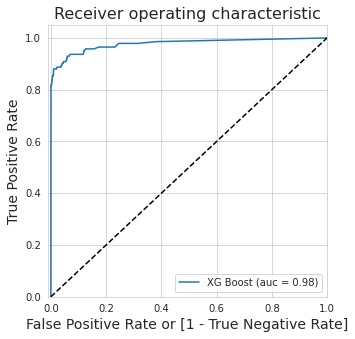

In [ ]:
draw_roc('XG Boost', y_test, y_test_pred_prob)

### Checking the  top 3 models on imbalanced dataset


In [ ]:
results.sort_values(by='Recall (Test)', ascending=False)[:3]

,Model,AUC (Train),AUC (Test),F1 (Train),F1 (Test),Recall (Train),Recall (Test),Accuracy (Train),Accuracy (Test)
9,"XGB, Imbalanced, cutoff=0.1, max_depth=3, learning_rate=0.07",0.99,0.98,0.84,0.78,0.86,0.81,0.99,0.98
3,"KNN, Imbalanced, cutoff=0.3, n_neighbors=3",1.00,0.90,0.90,0.74,1.00,0.80,1.00,0.90
5,"DT, Imbalanced, cutoff=0.1, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.78,0.84,0.80,0.95,0.95


In [ ]:
# plotting ROC for top3models
def draw_roc_top_n(model_results, actual):

    plt.figure(figsize=(5, 5))
    for model_type,probs in models_results.items():
      fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )

      auc_score = metrics.roc_auc_score( actual, probs )
    
      plt.plot( fpr, tpr, label= model_type + ' (auc = %0.2f)' % auc_score )

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('Receiver operating characteristic', fontsize=16)
    plt.legend(loc="lower right") 
    plt.show()

    return None

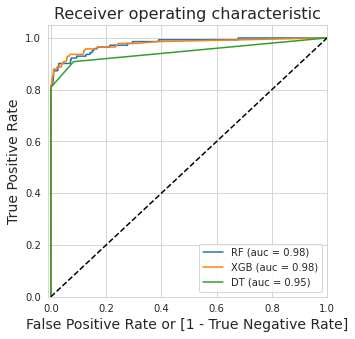

In [ ]:
models_results = {
    'RF': y_test_pred_prob_rf,
    'XGB': y_test_pred_prob_xgb,
    'DT': y_test_pred_prob_dt
}
draw_roc_top_n(models_results, y_test)

### Model Building based on balanced dataset
1. Decision Tree
2. Random Forest
3. XGBoost

Methods for balancing:
1. Random Oversampling
2. SMOTE
3. ADASYN

### Random Oversampling

In [ ]:
# create random samples for the minority class
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train_pt, y_train)
X_train_ros = pd.DataFrame(X_train_ros, columns=X_train_pt.columns)

#### Equal number of class distribution

###   Decision Tree (Balanced Data) with Random Over-Sampling

In [ ]:
classifier = DecisionTreeClassifier(random_state=100)
parameters = {
    'max_depth': list(range(8, 15, 1)),           
    'min_samples_leaf': list(range(8, 12, 1)),    
    'min_samples_split': list(range(7, 9, 1)),   
    'criterion': ['entropy','gini']}                     

model_cv = hyper_tuning(X_train_ros, y_train_ros, parameters, classifier, True, True)  
print('---' * 30)
print("Best AUC: ", model_cv.best_score_)
print("Best hyper-parameters: ", model_cv.best_params_)
print('---' * 30)

Fitting 3 folds for each of 112 candidates, totalling 336 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 336 out of 336 | elapsed: 11.0min finished


------------------------------------------------------------------------------------------
Best AUC:  0.9998173357557706
Best hyper-parameters:  {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 11, 'min_samples_split': 7}
------------------------------------------------------------------------------------------


In [ ]:
y_train_pred = model_cv.predict(X_train_ros)
y_train_pred_prob = model_cv.predict_proba(X_train_ros)[:, 1]
y_test_pred = model_cv.predict(X_test_pt)
y_test_pred_prob = model_cv.predict_proba(X_test_pt)[:, 1]
y_test_pred_prob_dt_ros = y_test_pred_prob
train_scores = print_scores('Decision Tree: Train Result', y_train_ros, y_train_pred, y_train_pred_prob)
test_scores = print_scores('Decision Tree: Test Result', y_test, y_test_pred, y_test_pred_prob)

------------------------------------------------------------------------------------------
Decision Tree: Train Result

Confusion matrix:
 [[198124    153]
 [     0 198277]]

Recall Score: 1.0000
Precision Score: 0.9992
F1 Score: 0.9996
Accuracy Score: 0.9996
AUC: 1.0000
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
Decision Tree: Test Result

Confusion matrix:
 [[84857   119]
 [   32   110]]

Recall Score: 0.7746
Precision Score: 0.4803
F1 Score: 0.5930
Accuracy Score: 0.9982
AUC: 0.8870
------------------------------------------------------------------------------------------


In [ ]:
temp_results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'DT_ROS, Balanced, cutoff=0.5')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),2),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),2),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),2),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),2)})

results = pd.concat([results, temp_results])
results.reset_index(drop=True, inplace=True)
results

,Model,AUC (Train),AUC (Test),F1 (Train),F1 (Test),Recall (Train),Recall (Test),Accuracy (Train),Accuracy (Test)
0,"LR, Imbalanced, cutoff=0.5, C=0.01, penalty=l2",0.98,0.98,0.71,0.667,0.59,0.535,0.98,0.98
1,"LR, Imbalanced, cutoff=0.1, C=0.01, penalty=l2",0.98,0.98,0.80,0.770,0.80,0.760,0.98,0.98
2,"KNN, Imbalanced, cutoff=0.5, n_neighbors=3",1.00,0.90,0.89,0.800,0.82,0.750,1.00,0.90
3,"KNN, Imbalanced, cutoff=0.3, n_neighbors=3",1.00,0.90,0.90,0.740,1.00,0.800,1.00,0.90
4,"DT, Imbalanced, cutoff=0.5, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.790,0.81,0.760,0.95,0.95
5,"DT, Imbalanced, cutoff=0.1, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.780,0.84,0.800,0.95,0.95
6,"RF, Imbalanced, cutoff=0.5, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.84,0.790,0.82,0.760,0.98,0.98
7,"RF, Imbalanced, cutoff=0.1, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.82,0.750,0.85,0.800,0.98,0.98
8,"XGB, Imbalanced, cutoff=0.5, max_depth=3, learning_rate=0.07",0.99,0.98,0.90,0.810,0.84,0.760,0.99,0.98
9,"XGB, Imbalanced, cutoff=0.1, max_depth=3, learning_rate=0.07",0.99,0.98,0.84,0.780,0.86,0.810,0.99,0.98


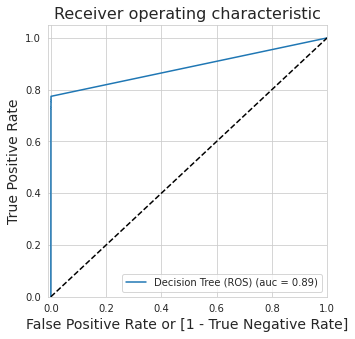

In [ ]:
draw_roc('Decision Tree (ROS)', y_test, y_test_pred_prob)

### Random Forest (Balanced Data) with Random Over-Sampling

In [ ]:
classifier = RandomForestClassifier(random_state=100)
parameters = {
    'max_depth': [3],               
    'min_samples_leaf': [7],        
    'min_samples_split': [7],      
    'criterion': ['entropy'],      
    'n_estimators': [200, 300],    
    'max_features': [15,20]         
    }                

model_cv = hyper_tuning(X_train_ros, y_train_ros, parameters, classifier, True, False) 
print('---' * 30)
print("Best AUC: ", model_cv.best_score_)
print("Best hyper-parameters: ", model_cv.best_params_)
print('---' * 30)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 24.3min finished


------------------------------------------------------------------------------------------
Best AUC:  0.9877790764999878
Best hyper-parameters:  {'n_estimators': 300, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 15, 'max_depth': 3, 'criterion': 'entropy'}
------------------------------------------------------------------------------------------


In [ ]:
y_train_pred = model_cv.predict(X_train_ros)
y_train_pred_prob = model_cv.predict_proba(X_train_ros)[:, 1]
y_test_pred = model_cv.predict(X_test_pt)
y_test_pred_prob = model_cv.predict_proba(X_test_pt)[:, 1]
y_test_pred_prob_rf_ros = y_test_pred_prob
train_scores = print_scores('Random Forest: Train Result', y_train_ros, y_train_pred, y_train_pred_prob)
test_scores = print_scores('Random Forest: Test Result', y_test, y_test_pred, y_test_pred_prob)

------------------------------------------------------------------------------------------
Random Forest: Train Result

Confusion matrix:
 [[197459    818]
 [ 20752 177525]]

Recall Score: 0.8953
Precision Score: 0.9954
F1 Score: 0.9427
Accuracy Score: 0.9456
AUC: 0.9878
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
Random Forest: Test Result

Confusion matrix:
 [[84586   390]
 [   24   118]]

Recall Score: 0.8310
Precision Score: 0.2323
F1 Score: 0.3631
Accuracy Score: 0.9951
AUC: 0.9744
------------------------------------------------------------------------------------------


In [ ]:
temp_results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'RF_ROS, Balanced, cutoff=0.5')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),2),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),2),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),2),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),2)})

results = pd.concat([results, temp_results])
results.reset_index(drop=True, inplace=True)
results

,Model,AUC (Train),AUC (Test),F1 (Train),F1 (Test),Recall (Train),Recall (Test),Accuracy (Train),Accuracy (Test)
0,"LR, Imbalanced, cutoff=0.5, C=0.01, penalty=l2",0.98,0.98,0.71,0.667,0.59,0.535,0.98,0.98
1,"LR, Imbalanced, cutoff=0.1, C=0.01, penalty=l2",0.98,0.98,0.80,0.770,0.80,0.760,0.98,0.98
2,"KNN, Imbalanced, cutoff=0.5, n_neighbors=3",1.00,0.90,0.89,0.800,0.82,0.750,1.00,0.90
3,"KNN, Imbalanced, cutoff=0.3, n_neighbors=3",1.00,0.90,0.90,0.740,1.00,0.800,1.00,0.90
4,"DT, Imbalanced, cutoff=0.5, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.790,0.81,0.760,0.95,0.95
5,"DT, Imbalanced, cutoff=0.1, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.780,0.84,0.800,0.95,0.95
6,"RF, Imbalanced, cutoff=0.5, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.84,0.790,0.82,0.760,0.98,0.98
7,"RF, Imbalanced, cutoff=0.1, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.82,0.750,0.85,0.800,0.98,0.98
8,"XGB, Imbalanced, cutoff=0.5, max_depth=3, learning_rate=0.07",0.99,0.98,0.90,0.810,0.84,0.760,0.99,0.98
9,"XGB, Imbalanced, cutoff=0.1, max_depth=3, learning_rate=0.07",0.99,0.98,0.84,0.780,0.86,0.810,0.99,0.98


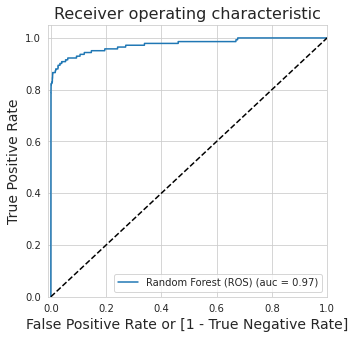

In [ ]:
draw_roc('Random Forest (ROS)', y_test, y_test_pred_prob)

### XG Boost (Balanced Data) with Random Over-Sampling

In [ ]:
classifier = XGBClassifier(random_state=100)

parameters = {
    'max_depth': list(range(4,9)),                           
    'learning_rate': [0.05, 0.08, 0.1, 0.5, 0.6]   
    }                   

model_cv = hyper_tuning(X_train_ros, y_train_ros, parameters, classifier, True, False) 
print('---' * 30)
print("Best AUC: ", model_cv.best_score_)
print("Best hyper-parameters: ", model_cv.best_params_)
print('---' * 30)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 11.4min finished


------------------------------------------------------------------------------------------
Best AUC:  0.9999968197622886
Best hyper-parameters:  {'max_depth': 6, 'learning_rate': 0.6}
------------------------------------------------------------------------------------------


In [ ]:
y_train_pred = model_cv.predict(X_train_ros)
y_train_pred_prob = model_cv.predict_proba(X_train_ros)[:, 1]
y_test_pred = model_cv.predict(X_test_pt)
y_test_pred_prob = model_cv.predict_proba(X_test_pt)[:, 1]
y_test_pred_prob_xgb_ros = y_test_pred_prob
train_scores = print_scores('XGBoost: Train Result', y_train_ros, y_train_pred, y_train_pred_prob)
test_scores = print_scores('XGBoost: Test Result', y_test, y_test_pred, y_test_pred_prob)

------------------------------------------------------------------------------------------
XGBoost: Train Result

Confusion matrix:
 [[198277      0]
 [     0 198277]]

Recall Score: 1.0000
Precision Score: 1.0000
F1 Score: 1.0000
Accuracy Score: 1.0000
AUC: 1.0000
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
XGBoost: Test Result

Confusion matrix:
 [[84964    12]
 [   30   112]]

Recall Score: 0.7887
Precision Score: 0.9032
F1 Score: 0.8421
Accuracy Score: 0.9995
AUC: 0.9725
------------------------------------------------------------------------------------------


In [ ]:
temp_results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'XGB_ROS, Balanced, cutoff=0.5')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),2),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),2),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),2),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),2)})

results = pd.concat([results, temp_results])
results.reset_index(drop=True, inplace=True)
results

,Model,AUC (Train),AUC (Test),F1 (Train),F1 (Test),Recall (Train),Recall (Test),Accuracy (Train),Accuracy (Test)
0,"LR, Imbalanced, cutoff=0.5, C=0.01, penalty=l2",0.98,0.98,0.71,0.667,0.59,0.535,0.98,0.98
1,"LR, Imbalanced, cutoff=0.1, C=0.01, penalty=l2",0.98,0.98,0.80,0.770,0.80,0.760,0.98,0.98
2,"KNN, Imbalanced, cutoff=0.5, n_neighbors=3",1.00,0.90,0.89,0.800,0.82,0.750,1.00,0.90
3,"KNN, Imbalanced, cutoff=0.3, n_neighbors=3",1.00,0.90,0.90,0.740,1.00,0.800,1.00,0.90
4,"DT, Imbalanced, cutoff=0.5, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.790,0.81,0.760,0.95,0.95
5,"DT, Imbalanced, cutoff=0.1, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.780,0.84,0.800,0.95,0.95
6,"RF, Imbalanced, cutoff=0.5, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.84,0.790,0.82,0.760,0.98,0.98
7,"RF, Imbalanced, cutoff=0.1, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.82,0.750,0.85,0.800,0.98,0.98
8,"XGB, Imbalanced, cutoff=0.5, max_depth=3, learning_rate=0.07",0.99,0.98,0.90,0.810,0.84,0.760,0.99,0.98
9,"XGB, Imbalanced, cutoff=0.1, max_depth=3, learning_rate=0.07",0.99,0.98,0.84,0.780,0.86,0.810,0.99,0.98


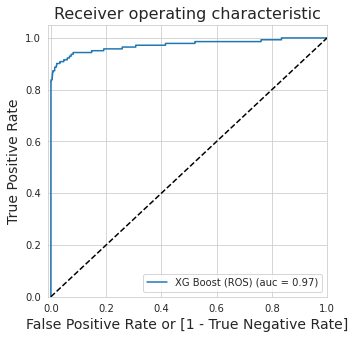

In [ ]:
draw_roc('XG Boost (ROS)', y_test, y_test_pred_prob)

###  SMOTE(Synthetic Minority Oversampling Technique)

#### Print the class distribution after applying SMOTE 

In [ ]:
# perform SMOTE Oversampling on train set
sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train_pt, y_train)
X_train_smote = pd.DataFrame(X_train_smote, columns=X_train_pt.columns)

### Decision Tree (Balanced Data) with SMOTE

In [ ]:
classifier = DecisionTreeClassifier(random_state=100)
parameters = {
    'max_depth': list(range(2, 4, 1)),           
    'min_samples_leaf': list(range(7, 9, 1)),    
    'min_samples_split': list(range(7, 9, 1)),   
    'criterion': ['entropy','gini']}             

model_cv = hyper_tuning(X_train_smote, y_train_smote, parameters, classifier, True, True) 
print('---' * 30)
print("Best AUC: ", model_cv.best_score_)
print("Best hyperparameters: ", model_cv.best_params_)
print('---' * 30)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  1.1min finished


------------------------------------------------------------------------------------------
Best AUC:  0.9746911961686275
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 7, 'min_samples_split': 7}
------------------------------------------------------------------------------------------


In [ ]:
y_train_pred = model_cv.predict(X_train_smote)
y_train_pred_prob = model_cv.predict_proba(X_train_smote)[:, 1]
y_test_pred = model_cv.predict(X_test_pt)
y_test_pred_prob = model_cv.predict_proba(X_test_pt)[:, 1]
y_test_pred_prob_dt_smote = y_test_pred_prob
train_scores = print_scores('Decision Tree: Train Result', y_train_smote, y_train_pred, y_train_pred_prob)
test_scores = print_scores('Decision Tree: Test Result', y_test, y_test_pred, y_test_pred_prob)



------------------------------------------------------------------------------------------
Decision Tree: Train Result

Confusion matrix:
 [[182919  15358]
 [ 12902 185375]]

Recall Score: 0.9349
Precision Score: 0.9235
F1 Score: 0.9292
Accuracy Score: 0.9287
AUC: 0.9749
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
Decision Tree: Test Result

Confusion matrix:
 [[78352  6624]
 [   15   127]]

Recall Score: 0.8944
Precision Score: 0.0188
F1 Score: 0.0368
Accuracy Score: 0.9220
AUC: 0.9572
------------------------------------------------------------------------------------------


In [ ]:
temp_results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'DT_SMOTE, Balanced, cutoff=0.5')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),2),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),2),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),2),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),2)})

results = pd.concat([results, temp_results])
results.reset_index(drop=True, inplace=True)
results

,Model,AUC (Train),AUC (Test),F1 (Train),F1 (Test),Recall (Train),Recall (Test),Accuracy (Train),Accuracy (Test)
0,"LR, Imbalanced, cutoff=0.5, C=0.01, penalty=l2",0.98,0.98,0.71,0.667,0.59,0.535,0.98,0.98
1,"LR, Imbalanced, cutoff=0.1, C=0.01, penalty=l2",0.98,0.98,0.80,0.770,0.80,0.760,0.98,0.98
2,"KNN, Imbalanced, cutoff=0.5, n_neighbors=3",1.00,0.90,0.89,0.800,0.82,0.750,1.00,0.90
3,"KNN, Imbalanced, cutoff=0.3, n_neighbors=3",1.00,0.90,0.90,0.740,1.00,0.800,1.00,0.90
4,"DT, Imbalanced, cutoff=0.5, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.790,0.81,0.760,0.95,0.95
5,"DT, Imbalanced, cutoff=0.1, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7",0.95,0.95,0.83,0.780,0.84,0.800,0.95,0.95
6,"RF, Imbalanced, cutoff=0.5, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.84,0.790,0.82,0.760,0.98,0.98
7,"RF, Imbalanced, cutoff=0.1, n_estimators=300, min_samples_split=7, min_samples_leaf=7, max_features=20, max_depth=3, criterion=entropy",0.98,0.98,0.82,0.750,0.85,0.800,0.98,0.98
8,"XGB, Imbalanced, cutoff=0.5, max_depth=3, learning_rate=0.07",0.99,0.98,0.90,0.810,0.84,0.760,0.99,0.98
9,"XGB, Imbalanced, cutoff=0.1, max_depth=3, learning_rate=0.07",0.99,0.98,0.84,0.780,0.86,0.810,0.99,0.98


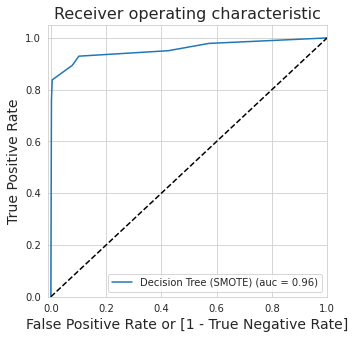

In [ ]:
draw_roc('Decision Tree (SMOTE)', y_test, y_test_pred_prob)

### Random Forest (Balanced Data) with SMOTE

In [ ]:
classifier = RandomForestClassifier(random_state=100)
parameters = {
    'max_depth': [3],               
    'min_samples_leaf': [7],        
    'min_samples_split': [7],      
    'criterion': ['entropy'],      
    'n_estimators': [200, 300],     
    'max_features': [15,20]         
    }                   

model_cv = hyper_tuning(X_train_smote, y_train_smote, parameters, classifier, True, False)  
print('---' * 30)
print("Best AUC: ", model_cv.best_score_)
print("Best hyper-parameters: ", model_cv.best_params_)
print('---' * 30)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
y_train_pred = model_cv.predict(X_train_smote)
y_train_pred_prob = model_cv.predict_proba(X_train_smote)[:, 1]
y_test_pred = model_cv.predict(X_test_pt)
y_test_pred_prob = model_cv.predict_proba(X_test_pt)[:, 1]
y_test_pred_prob_rf_smote = y_test_pred_prob
train_scores = print_scores('Random Forest: Train Result', y_train_smote, y_train_pred, y_train_pred_prob)
test_scores = print_scores('Random Forest: Test Result', y_test, y_test_pred, y_test_pred_prob)

In [ ]:
temp_results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'RF_SMOTE, Balanced, cutoff=0.5')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),2),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),2),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),2),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),2)})

results = pd.concat([results, temp_results])
results.reset_index(drop=True, inplace=True)
results

In [ ]:
draw_roc('Random Forest (SMOTE)', y_test, y_test_pred_prob)

###   XGBoost (Balanced Data) with SMOTE

In [ ]:
classifier = XGBClassifier(random_state=100)

parameters = {
    'max_depth': [4,5,8,9],               
    'learning_rate': [0.05, 0.08, 0.1, 0.5]   
    }    

model_cv = hyper_tuning(X_train_smote, y_train_smote, parameters, classifier, True, False)  
print('---' * 30)
print("Best AUC: ", model_cv.best_score_)
print("Best hyperparameters: ", model_cv.best_params_)
print('---' * 30)

In [ ]:
y_train_pred = model_cv.predict(X_train_smote)
y_train_pred_prob = model_cv.predict_proba(X_train_smote)[:, 1]
y_test_pred = model_cv.predict(X_test_pt)
y_test_pred_prob = model_cv.predict_proba(X_test_pt)[:, 1]
y_test_pred_prob_xgb_smote = y_test_pred_prob
train_scores = print_scores('XGBoost: Train Result', y_train_smote, y_train_pred, y_train_pred_prob)
test_scores = print_scores('XGBoost: Test Result', y_test, y_test_pred, y_test_pred_prob)

In [ ]:
temp_results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'XGB_SMOTE, Balanced, cutoff=0.5')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),2),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),2),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),2),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),2)})

results = pd.concat([results, temp_results])
results.reset_index(drop=True, inplace=True)
results

In [ ]:
draw_roc('XG Boost (SMOTE)', y_test, y_test_pred_prob)

###  ADASYN (Adaptive Synthetic Sampling Method)

#### Print the class distribution after applying ADASYN

In [ ]:
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train_pt, y_train)

In [ ]:
X_train_adasyn = pd.DataFrame(X_train_adasyn, columns=X_train_pt.columns)

###  Decision Tree (Balanced Data) with ADASYN

In [ ]:
classifier = DecisionTreeClassifier(random_state=100)
parameters = {
    'max_depth': list(range(2, 4, 1)),           
    'min_samples_leaf': list(range(7, 9, 1)),    
    'min_samples_split': list(range(7, 9, 1)),   
    'criterion': ['entropy','gini']}             

model_cv = hyper_tuning(X_train_adasyn, y_train_adasyn, parameters, classifier, True, True)  
print('---' * 30)
print("Best AUC: ", model_cv.best_score_)
print("Best hyperparameters: ", model_cv.best_params_)
print('---' * 30)

In [ ]:
y_train_pred = model_cv.predict(X_train_adasyn)
y_train_pred_prob = model_cv.predict_proba(X_train_adasyn)[:, 1]
y_test_pred = model_cv.predict(X_test_pt)
y_test_pred_prob = model_cv.predict_proba(X_test_pt)[:, 1]
y_test_pred_prob_dt_ada = y_test_pred_prob
train_scores = print_scores('Decision Tree: Train Result', y_train_adasyn, y_train_pred, y_train_pred_prob)
test_scores = print_scores('Decision Tree: Test Result', y_test, y_test_pred, y_test_pred_prob)

In [ ]:
temp_results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'DT_ADASYN, Balanced, cutoff=0.5')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),2),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),2),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),2),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),2)})

results = pd.concat([results, temp_results])
results.reset_index(drop=True, inplace=True)
results

In [ ]:
draw_roc('Decision Tree (ADASYN)', y_test, y_test_pred_prob)

###  Random Forest (Balanced Data) with ADASYN

In [ ]:
classifier = RandomForestClassifier(random_state=100)
parameters = {
    'max_depth': [3],               
    'min_samples_leaf': [7],        
    'min_samples_split': [7],       
    'criterion': ['entropy'],       
    'n_estimators': [200, 300],     
    'max_features': [15,20]         
    }                   

model_cv = hyper_tuning(X_train_adasyn, y_train_adasyn, parameters, classifier, True, False)  
print('---' * 30)
print("Best AUC: ", model_cv.best_score_)
print("Best hyper-parameters: ", model_cv.best_params_)
print('---' * 30)

In [ ]:
y_train_pred = model_cv.predict(X_train_adasyn)
y_train_pred_prob = model_cv.predict_proba(X_train_adasyn)[:, 1]
y_test_pred = model_cv.predict(X_test_pt)
y_test_pred_prob = model_cv.predict_proba(X_test_pt)[:, 1]
y_test_pred_prob_rf_ada = y_test_pred_prob
train_scores = print_scores('Random Forest: Train Result', y_train_adasyn, y_train_pred, y_train_pred_prob)
test_scores = print_scores('Random Forest: Test Result', y_test, y_test_pred, y_test_pred_prob)

In [ ]:
temp_results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'RF_ADASYN, Balanced, cutoff=0.5')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),2),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),2),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),2),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),2)})

results = pd.concat([results, temp_results])
results.reset_index(drop=True, inplace=True)
results

In [ ]:
draw_roc('Random Forest (ADASYN)', y_test, y_test_pred_prob)

###   XGBoost (Balanced Data) with ADASYN

In [ ]:
classifier = XGBClassifier(random_state=100)

parameters = {
    'max_depth': [3,4,5,6,7,8,9],               
    'learning_rate': [0.05, 0.08, 0.1, 0.5, 0.6]   
    }                   

model_cv = hyper_tuning(X_train_adasyn, y_train_adasyn, parameters, classifier, True, False) 
print('---' * 30)
print("Best AUC: ", model_cv.best_score_)
print("Best hyper-parameters: ", model_cv.best_params_)
print('---' * 30)

In [ ]:
y_train_pred = model_cv.predict(X_train_adasyn)
y_train_pred_prob = model_cv.predict_proba(X_train_adasyn)[:, 1]
y_test_pred = model_cv.predict(X_test_pt)
y_test_pred_prob = model_cv.predict_proba(X_test_pt)[:, 1]
y_test_pred_prob_xgb_ada = y_test_pred_prob
train_scores = print_scores('XGBoost: Train Result', y_train_adasyn, y_train_pred, y_train_pred_prob)
test_scores = print_scores('XGBoost: Test Result', y_test, y_test_pred, y_test_pred_prob)

In [ ]:
temp_results = pd.DataFrame({
    'Model': [get_param_str(model_cv, 'XGB_ADASYN, Balanced, cutoff=0.5')],
    'AUC (Train)' : round(train_scores.get('AUC'),2), 'AUC (Test)' : round(test_scores.get('AUC'),2),
    'F1 (Train)' : round(train_scores.get('F1'),2), 'F1 (Test)' : round(test_scores.get('F1'),2),
    'Recall (Train)': round(train_scores.get('Recall'),2), 'Recall (Test)': round(test_scores.get('Recall'),2),
    'Accuracy (Train)': round(train_scores.get('Accuracy'),2), 'Accuracy (Test)': round(test_scores.get('Accuracy'),2)})

results = pd.concat([results, temp_results])
results.reset_index(drop=True, inplace=True)
results

In [ ]:
draw_roc('XG Boost (ADASYN)', y_test, y_test_pred_prob)

In [ ]:
# printing the models with high Recall values
results.sort_values(by=['Recall (Test)', 'AUC (Test)', 'F1 (Test)'], ascending=False)

In [ ]:
# plotting ROC curves for the top 3 models
models_results = {
    'DT ADASYN': y_test_pred_prob_dt_ada,
    'RF ADASYN': y_test_pred_prob_rf_ada,
    'DT SMOTE': y_test_pred_prob_dt_smote
}

draw_roc_top_n(models_results, y_test)


### Performance is best oversampling method on the best model
- Oversampling method: **ADASYN**
- Model: **Decision Tree**
- Metric: **Recall**


In [ ]:
clf = DecisionTreeClassifier(random_state=100, max_depth=3, min_samples_leaf=7, min_samples_split=7, criterion='gini') 
clf.fit(X_train_adasyn,y_train_adasyn) 
y_train_pred = clf.predict(X_train_adasyn)
y_train_pred_prob = clf.predict_proba(X_train_adasyn)[:,1]
y_test_pred = clf.predict(X_test_pt)
y_test_pred_prob = clf.predict_proba(X_test_pt)[:,1]
best_recall = metrics.recall_score(y_test,y_test_pred)
print('Best recall value:', best_recall)  

### Print the important features of the best model to understand the dataset

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var (Index) =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var (Index) =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var (Index) =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train_smote.to_numpy()[np.where(y_train_smote==1.0)]
X_train_0 = X_train_smote.to_numpy()[np.where(y_train_smote==0.0)]

np.random.shuffle(X_train_0)

plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

plt.show()

-------------------------------------------------------------------------------------------------
#### Print the FPR,TPR & select the best threshold from the roc curve
-------------------------------------------------------------------------------------------------

In [ ]:
print('Train auc =', metrics.roc_auc_score(y_train_adasyn,y_train_pred_prob))
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_train_pred_prob,drop_intermediate = False)
threshold = thresholds[np.argmax(tpr-fpr)]
print('Best threshold from ROC curve:',threshold)


Cost Analysis


In [ ]:
total_fraud_amount = df['Amount'].loc[df['Class']==1].sum()
fraud_amt_saved = total_fraud_amount*best_recall
print('Out of {0} Euros, {1} Euros can be saved using this model.'.format(total_fraud_amount.round(0),fraud_amt_saved.round(0)))
print('{0} % of the total fraud amount can be saved.'.format(round(100*(fraud_amt_saved/total_fraud_amount),2)))